# **Proyecto Final Unidad 6 Metodologias Agiles para Proyectos de Machine Learning**
---
##**Presentado por**:  
# Daniel Cardozo

##**Tema**:
# **Aplicación de Deep Learning para la Interpretacion Clínica de Pruebas de Sensibilidad Antimicrobiana (SIR)**


# **4.Entrenamiento y Validación**
---



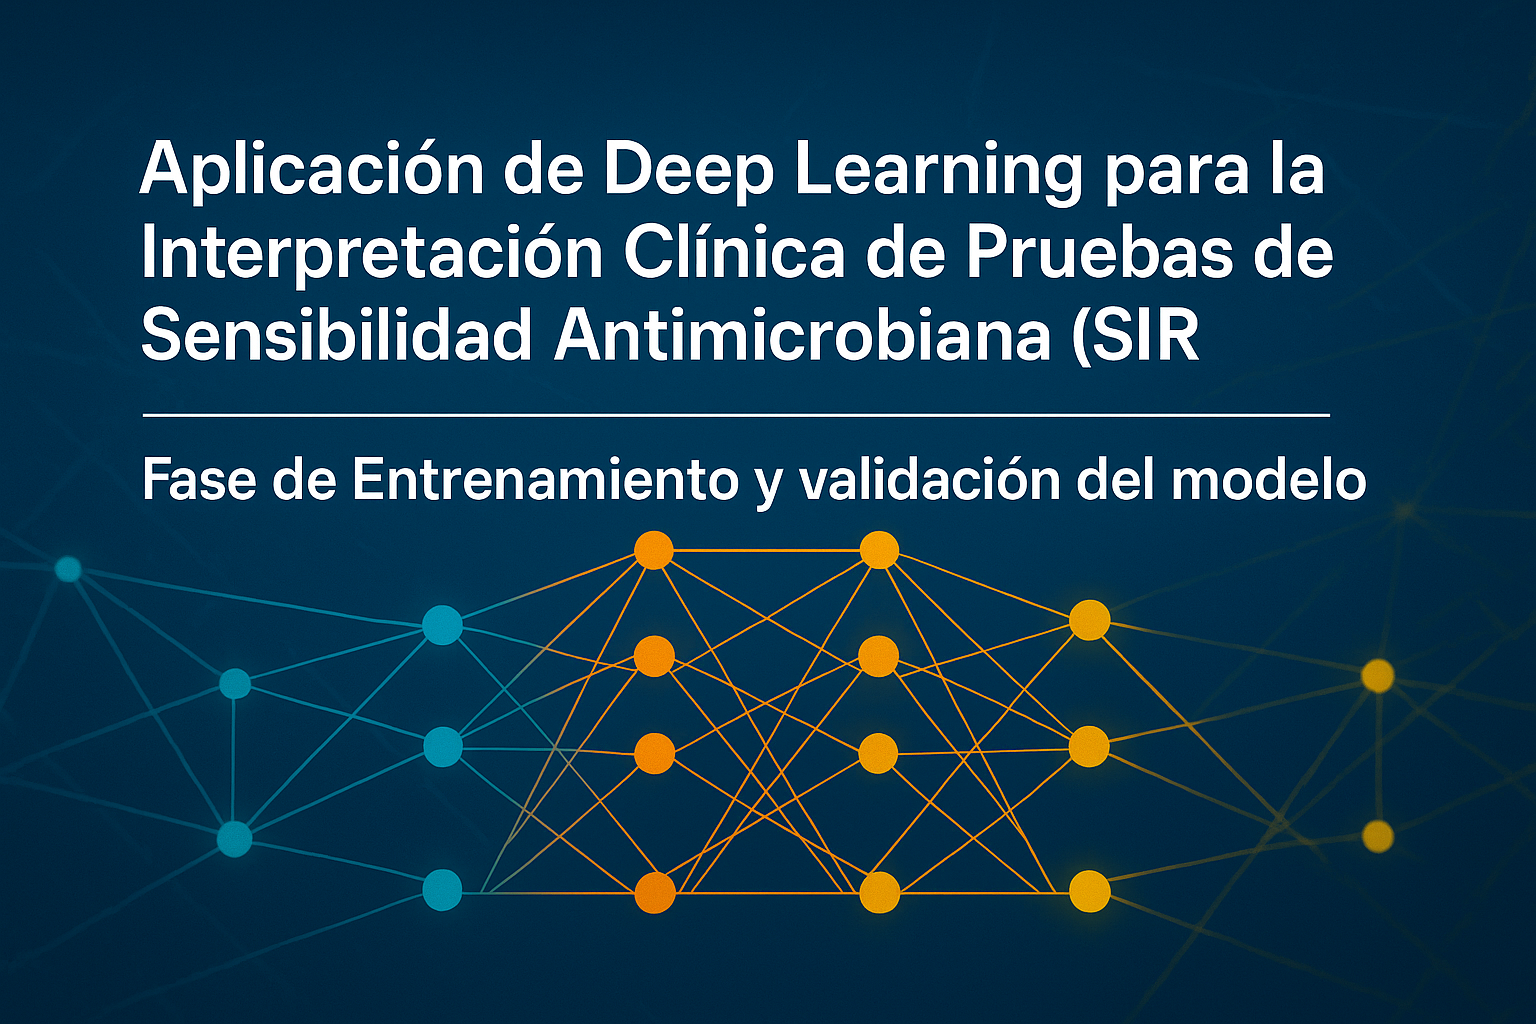

## **4.1 Cargar Datos preprocesados**

In [ ]:
# Aseguramos orden y nombramiento correcto
n_outputs_x = len(X_train_list)
n_outputs_y = len(y_train_list)
print(f'tamaño de diccionario de BD de diccionario en X train {n_outputs_x}')
print(f'tamaño de diccionario de BD de diccionario en y train {n_outputs_y} \n')

for nombre in X_train_list:
    X = X_train_list[nombre].values
    y = y_train_list[nombre]
    print(f'datos del atb {nombre} con forma en "X" {X.shape} y en "y" {y.shape}')

tamaño de diccionario de BD de diccionario en X train 38
tamaño de diccionario de BD de diccionario en y train 38 

datos del atb whonet_AMK_NM con forma en "X" (26134, 2) y en "y" (26134,)
datos del atb whonet_AMP_NM con forma en "X" (6184, 2) y en "y" (6184,)
datos del atb whonet_ATM_NM con forma en "X" (7543, 2) y en "y" (7543,)
datos del atb whonet_CAS_NM con forma en "X" (3349, 2) y en "y" (3349,)
datos del atb whonet_CAZ_NM con forma en "X" (26120, 2) y en "y" (26120,)
datos del atb whonet_CIP_NM con forma en "X" (34467, 2) y en "y" (34467,)
datos del atb whonet_CLI_NM con forma en "X" (4348, 2) y en "y" (4348,)
datos del atb whonet_CPT_NM con forma en "X" (2200, 2) y en "y" (2200,)
datos del atb whonet_CRO_NM con forma en "X" (15988, 2) y en "y" (15988,)
datos del atb whonet_CTX_NM con forma en "X" (3940, 2) y en "y" (3940,)
datos del atb whonet_CZA_NM con forma en "X" (7739, 2) y en "y" (7739,)
datos del atb whonet_CZO_NM con forma en "X" (7557, 2) y en "y" (7557,)
datos del at

In [ ]:
#Definimos nuestro modelo

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dense, Concatenate, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

#Resultado de Gridsearch
learning_rate = 0.0005788366781029293
batch_size = 64


def build_single_model(X,n_classes):
    num_micro = num_micro = X['LOCAL_ORG'].max() + 1
    embedding_dim = 8
    dropout_rate = 0.1816
    n_neurons = 32

    input_micro = Input(shape=(1,), name='LOCAL_ORG')
    embedding = Embedding(input_dim=num_micro, output_dim=embedding_dim)(input_micro)
    embedding = Flatten()(embedding)

    input_atb = Input(shape=(1,), name='atb')

    x = Concatenate()([embedding, input_atb])

    x = Dense(n_neurons, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = BatchNormalization()(x)

    x = Dense(n_neurons, activation='relu')(x)
    x = Dropout(dropout_rate)(x)
    x = BatchNormalization()(x)

    output = Dense(n_classes, activation='softmax')(x)

    model = Model(inputs=[input_micro, input_atb], outputs=output)
    return model

In [ ]:
checkpoint = keras.callbacks.ModelCheckpoint(
                  filepath='best_weights.weights.h5', # Path del archivo donde se guardarán los pesos o el modelo.
                  monitor="accuracy",              # La métrica que se va a monitorear.
                  mode="max",                 # Se quiere guardar el modelo que reporte el accuracy máximo: max.
                  save_best_only=True,        # Si se define True, entonces solo se guarda el mejor modelo.
                  save_weights_only=True      # Si se define True, solo se guardan los pesos, no la arquitectura.
              )

In [ ]:
stopping = keras.callbacks.EarlyStopping(
                monitor="accuracy",            # La métrica que se va a monitorear.
                patience=20,              # Si después de 20 epochs la métrica no mejora, se detiene el entrenamiento.
                mode="max",               # Se quiere guardar el modelo que reporte el accuracy máximo: max.
                restore_best_weights=True # Si True, automaticamente se cargan al modelo los mejores pesos.
            )

## **1. Entrenamiento del Modelo y Selección de Hiperparámetros**
---

Si está utilizando un modelo que requiere entrenamiento, deberá entrenarlo y seleccionar un conjunto de hiperparámetros válido para el mismo. Recuerde que tiene diversas erramientas para hacer validación.

In [ ]:
models = {}
histories = {}

for nombre, df in X_train_list.items():
    # Extraer inputs

    #X = X_train_list[nombre]
    df['LOCAL_ORG'] = pd.to_numeric(df['LOCAL_ORG'], errors='coerce')
    antibiotico = nombre.replace("whonet_", "")
    print(antibiotico)
    df[antibiotico]= df[antibiotico].astype('float32').values
    print(df['LOCAL_ORG'].max())
    print(df[antibiotico].max())

    y = y_train_list[nombre]
    weights= class_weights_list[nombre]

    model = build_single_model(df,n_classes=3)
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()

    print(df.dtypes)
    print(df.head())

    # Entrenar el modelo
    history = model.fit(x={'LOCAL_ORG': df['LOCAL_ORG'], 'atb': df[antibiotico]},
              y=y,
              epochs=100,
              batch_size=batch_size,
              callbacks=[checkpoint, stopping],
              class_weight=weights,
              validation_split=0.2)

    models[nombre] = model
    histories[nombre] = history

AMK_NM
62
64.0


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_1         │ (None, 1, 8)      │        504 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 8)         │          0 │ embedding_1[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 9)         │          0 │ flatten_1[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │        320 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_2[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 32)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_3[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,235 (8.73 KB)

 Trainable params: 2,107 (8.23 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
AMK_NM       float32
dtype: object
       LOCAL_ORG  AMK_NM
15480         47     2.0
25255         25     2.0
47237         47     4.0
38679         25     2.0
23842         31     4.0
Epoch 1/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.5647 - loss: 1.3858 - val_accuracy: 0.8378 - val_loss: 0.4372
Epoch 2/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8423 - loss: 0.8071 - val_accuracy: 0.9749 - val_loss: 0.2260
Epoch 3/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8951 - loss: 0.6843 - val_accuracy: 0.9751 - val_loss: 0.1654
Epoch 4/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9195 - loss: 0.6807 - val_accuracy: 0.9851 - val_loss: 0.1175
Epoch 5/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9273 - loss: 0.6020 - val_accuracy: 0.9826 - val_loss: 0.1084
Epoch 6/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9339 - loss: 0.5415 - val_accuracy: 0.9860 - val_loss: 0.0950
Epoch 7/100
327/32

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 1, 8)      │        176 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 8)         │          0 │ embedding_2[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 9)         │          0 │ flatten_2[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │        320 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 32)        │          0 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_4[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ dense_7[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_5[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,907 (7.45 KB)

 Trainable params: 1,779 (6.95 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
AMP_NM       float32
dtype: object
       LOCAL_ORG  AMP_NM
7747           6    16.0
23454          4    16.0
18676          6    16.0
9578           3     2.0
11887          6     4.0
Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - accuracy: 0.2902 - loss: 1.8685 - val_accuracy: 0.9248 - val_loss: 0.9084
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7593 - loss: 1.0244 - val_accuracy: 0.9652 - val_loss: 0.5463
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8207 - loss: 0.9589 - val_accuracy: 0.9652 - val_loss: 0.3957
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7874 - loss: 1.0013 - val_accuracy: 0.9652 - val_loss: 0.3186
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7918 - loss: 0.8195 - val_accuracy: 0.9652 - val_loss: 0.3025
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8110 - loss: 0.8356 - val_accuracy: 0.9652 - val_loss: 0.2798
Epoch 7/100
78/78 ━━━━━━━━━━━━━

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, 1, 8)      │        336 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 8)         │          0 │ embedding_3[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 9)         │          0 │ flatten_3[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │        320 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_9[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_6[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 32)        │          0 │ dense_10[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_7[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,067 (8.07 KB)

 Trainable params: 1,939 (7.57 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
ATM_NM       float32
dtype: object
       LOCAL_ORG  ATM_NM
26165         16     1.0
47965         21     1.0
13876         25     1.0
27490         21     1.0
17450         17    16.0
Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7495 - loss: 0.9022 - val_accuracy: 0.9801 - val_loss: 0.6145
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8494 - loss: 0.5704 - val_accuracy: 0.9841 - val_loss: 0.3501
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9111 - loss: 0.4755 - val_accuracy: 0.9841 - val_loss: 0.1981
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9383 - loss: 0.3518 - val_accuracy: 0.9841 - val_loss: 0.1293
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9450 - loss: 0.2973 - val_accuracy: 0.9841 - val_loss: 0.0982
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9457 - loss: 0.4774 - val_accuracy: 1.0000 - val_loss: 0.0869
Epoch 7/100
95/95 ━━━━━━━━━━━━━

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_4         │ (None, 1, 8)      │         48 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 8)         │          0 │ embedding_4[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 9)         │          0 │ flatten_4[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │        320 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 32)        │          0 │ dense_12[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_8[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ dense_13[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_9[0][0]   │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,779 (6.95 KB)

 Trainable params: 1,651 (6.45 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CAS_NM       float32
dtype: object
       LOCAL_ORG  CAS_NM
27785          0    0.12
33712          3    0.12
25888          0    0.12
31265          0    0.12
41462          3    0.12
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 9s 93ms/step - accuracy: 0.4376 - loss: 1.3863 - val_accuracy: 0.2716 - val_loss: 1.0179
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4324 - loss: 0.9583 - val_accuracy: 0.9373 - val_loss: 0.9385
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4833 - loss: 0.7845 - val_accuracy: 0.9881 - val_loss: 0.8504
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5177 - loss: 0.7552 - val_accuracy: 0.9881 - val_loss: 0.7593
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5716 - loss: 0.6857 - val_accuracy: 0.9896 - val_loss: 0.6788
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6083 - loss: 0.8055 - val_accuracy: 0.9896 - val_loss: 0.6006
Epoch 7/100
42/42 ━━━━━━━━━━━━━

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_5         │ (None, 1, 8)      │        496 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 8)         │          0 │ embedding_5[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_5       │ (None, 9)         │          0 │ flatten_5[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_15 (Dense)    │ (None, 32)        │        320 │ concatenate_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 32)        │          0 │ dense_15[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_10[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_16 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 32)        │          0 │ dense_16[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_11[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_17 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,227 (8.70 KB)

 Trainable params: 2,099 (8.20 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CAZ_NM       float32
dtype: object
       LOCAL_ORG  CAZ_NM
21291         29    1.00
37036         45    2.00
29705         23    8.00
22004         23    0.12
19587         13    8.00
Epoch 1/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.6836 - loss: 0.7547 - val_accuracy: 0.9916 - val_loss: 0.1411
Epoch 2/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9338 - loss: 0.2050 - val_accuracy: 0.9847 - val_loss: 0.0538
Epoch 3/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9689 - loss: 0.1072 - val_accuracy: 0.9994 - val_loss: 0.0276
Epoch 4/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9852 - loss: 0.0635 - val_accuracy: 0.9996 - val_loss: 0.0139
Epoch 5/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9915 - loss: 0.0480 - val_accuracy: 0.9996 - val_loss: 0.0066
Epoch 6/100
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9946 - loss: 0.0280 - val_accuracy: 0.9996 - val_loss: 0.0044
Epoch 7/100
327/32

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_6         │ (None, 1, 8)      │        664 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_6 (Flatten) │ (None, 8)         │          0 │ embedding_6[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_6       │ (None, 9)         │          0 │ flatten_6[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_18 (Dense)    │ (None, 32)        │        320 │ concatenate_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 32)        │          0 │ dense_18[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_12[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_19 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 32)        │          0 │ dense_19[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_13[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_20 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,395 (9.36 KB)

 Trainable params: 2,267 (8.86 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CIP_NM       float32
dtype: object
       LOCAL_ORG  CIP_NM
45115         60    0.50
14412         51    0.12
23938         39    0.50
47032         29    0.25
25029         29    0.50
Epoch 1/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7436 - loss: 0.7035 - val_accuracy: 0.9684 - val_loss: 0.1651
Epoch 2/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9595 - loss: 0.1473 - val_accuracy: 0.9981 - val_loss: 0.0234
Epoch 3/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9808 - loss: 0.0738 - val_accuracy: 0.9988 - val_loss: 0.0114
Epoch 4/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9890 - loss: 0.0456 - val_accuracy: 0.9988 - val_loss: 0.0082
Epoch 5/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9897 - loss: 0.0377 - val_accuracy: 0.9987 - val_loss: 0.0094
Epoch 6/100
431/431 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9955 - loss: 0.0224 - val_accuracy: 0.9987 - val_loss: 0.0087
Epoch 7/100
431/431

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_7         │ (None, 1, 8)      │        176 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_7 (Flatten) │ (None, 8)         │          0 │ embedding_7[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 9)         │          0 │ flatten_7[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_21 (Dense)    │ (None, 32)        │        320 │ concatenate_7[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ dense_21[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_14[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_22 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 32)        │          0 │ dense_22[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_15[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_23 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,907 (7.45 KB)

 Trainable params: 1,779 (6.95 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CLI_NM       float32
dtype: object
       LOCAL_ORG  CLI_NM
16125          0    0.12
4834           4    2.00
44902          0    0.25
15838          0    0.12
25237         10    0.25
Epoch 1/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 8s 63ms/step - accuracy: 0.4500 - loss: 1.0759 - val_accuracy: 0.9943 - val_loss: 0.9660
Epoch 2/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6865 - loss: 1.2812 - val_accuracy: 0.9943 - val_loss: 0.8190
Epoch 3/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7558 - loss: 0.3952 - val_accuracy: 0.9943 - val_loss: 0.6555
Epoch 4/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7947 - loss: 0.3619 - val_accuracy: 0.9943 - val_loss: 0.5226
Epoch 5/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8326 - loss: 0.4773 - val_accuracy: 0.9989 - val_loss: 0.3907
Epoch 6/100
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8595 - loss: 0.4554 - val_accuracy: 0.9943 - val_loss: 0.2956
Epoch 7/100
55/55 ━━━━━━━━━━━━

Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_8         │ (None, 1, 8)      │          8 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_8 (Flatten) │ (None, 8)         │          0 │ embedding_8[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_8       │ (None, 9)         │          0 │ flatten_8[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_24 (Dense)    │ (None, 32)        │        320 │ concatenate_8[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 32)        │          0 │ dense_24[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_16[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_25 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32)        │          0 │ dense_25[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_17[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_26 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,739 (6.79 KB)

 Trainable params: 1,611 (6.29 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CPT_NM       float32
dtype: object
       LOCAL_ORG  CPT_NM
40493          0    0.25
32469          0    0.25
2356           0    0.25
43210          0    0.25
38075          0    0.25
Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 7s 98ms/step - accuracy: 0.3509 - loss: 1.9014 - val_accuracy: 0.9977 - val_loss: 1.0214
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3669 - loss: 0.7336 - val_accuracy: 1.0000 - val_loss: 0.9346
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4018 - loss: 0.8848 - val_accuracy: 1.0000 - val_loss: 0.8592
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4087 - loss: 0.6719 - val_accuracy: 1.0000 - val_loss: 0.7944
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4163 - loss: 0.6520 - val_accuracy: 1.0000 - val_loss: 0.7345
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4528 - loss: 0.6822 - val_accuracy: 1.0000 - val_loss: 0.6735
Epoch 7/100
28/28 ━━━━━━━━━━━━

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_9         │ (None, 1, 8)      │        496 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_9 (Flatten) │ (None, 8)         │          0 │ embedding_9[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_9       │ (None, 9)         │          0 │ flatten_9[0][0],  │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_27 (Dense)    │ (None, 32)        │        320 │ concatenate_9[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 32)        │          0 │ dense_27[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_18[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_28 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 32)        │          0 │ dense_28[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_19[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_29 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,227 (8.70 KB)

 Trainable params: 2,099 (8.20 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CRO_NM       float32
dtype: object
       LOCAL_ORG  CRO_NM
26099         19    0.25
2036           6    1.00
13589         19   32.00
18930         19    0.25
30638         19   32.00
Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7410 - loss: 0.9953 - val_accuracy: 0.9816 - val_loss: 0.2765
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9004 - loss: 0.5383 - val_accuracy: 0.9781 - val_loss: 0.1709
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9134 - loss: 0.4055 - val_accuracy: 0.9759 - val_loss: 0.1323
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9524 - loss: 0.3379 - val_accuracy: 0.9816 - val_loss: 0.1245
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9495 - loss: 0.3304 - val_accuracy: 0.9715 - val_loss: 0.1227
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9478 - loss: 0.3052 - val_accuracy: 0.9740 - val_loss: 0.0864
Epoch 7/100
200/200

Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 1, 8)      │        312 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_10          │ (None, 8)         │          0 │ embedding_10[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_10      │ (None, 9)         │          0 │ flatten_10[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_30 (Dense)    │ (None, 32)        │        320 │ concatenate_10[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_20          │ (None, 32)        │          0 │ dense_30[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_20[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_31 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_21          │ (None, 32)        │          0 │ dense_31[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_21[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_32 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,043 (7.98 KB)

 Trainable params: 1,915 (7.48 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CTX_NM       float32
dtype: object
       LOCAL_ORG  CTX_NM
18444         10     1.0
37540         11     1.0
3355          10     1.0
4533          27     1.0
32974         10     1.0
Epoch 1/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.2008 - loss: 1.7431 - val_accuracy: 0.8477 - val_loss: 1.0428
Epoch 2/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5053 - loss: 1.0859 - val_accuracy: 0.9835 - val_loss: 0.8294
Epoch 3/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7120 - loss: 0.9175 - val_accuracy: 0.9835 - val_loss: 0.7107
Epoch 4/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7315 - loss: 1.0092 - val_accuracy: 0.9835 - val_loss: 0.6191
Epoch 5/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7358 - loss: 0.7760 - val_accuracy: 0.9784 - val_loss: 0.5524
Epoch 6/100
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7517 - loss: 0.9122 - val_accuracy: 0.9835 - val_loss: 0.4875
Epoch 7/100
50/50 ━━━━━━━━━━━━━

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 1, 8)      │        280 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_11          │ (None, 8)         │          0 │ embedding_11[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_11      │ (None, 9)         │          0 │ flatten_11[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_33 (Dense)    │ (None, 32)        │        320 │ concatenate_11[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_22          │ (None, 32)        │          0 │ dense_33[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_22[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_34 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_23          │ (None, 32)        │          0 │ dense_34[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_23[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_35 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,011 (7.86 KB)

 Trainable params: 1,883 (7.36 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CZA_NM       float32
dtype: object
       LOCAL_ORG  CZA_NM
47499         29    8.00
23452         15    4.00
44597         22    0.12
15558         15    0.12
47543         15    4.00
Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 9s 39ms/step - accuracy: 0.6085 - loss: 1.1246 - val_accuracy: 0.9677 - val_loss: 0.7154
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8037 - loss: 0.4471 - val_accuracy: 0.9761 - val_loss: 0.4716
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9046 - loss: 0.3512 - val_accuracy: 0.9761 - val_loss: 0.3397
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9504 - loss: 0.2505 - val_accuracy: 0.9761 - val_loss: 0.2552
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9611 - loss: 0.2081 - val_accuracy: 0.9839 - val_loss: 0.2113
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9736 - loss: 0.1725 - val_accuracy: 0.9839 - val_loss: 0.1850
Epoch 7/100
97/97 ━━━━━━━━━━━━━

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 1, 8)      │        152 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_12          │ (None, 8)         │          0 │ embedding_12[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_12      │ (None, 9)         │          0 │ flatten_12[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_36 (Dense)    │ (None, 32)        │        320 │ concatenate_12[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_24          │ (None, 32)        │          0 │ dense_36[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_24[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_37 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_25          │ (None, 32)        │          0 │ dense_37[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_25[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_38 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,883 (7.36 KB)

 Trainable params: 1,755 (6.86 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CZO_NM       float32
dtype: object
       LOCAL_ORG  CZO_NM
23902          6     4.0
33608          6    32.0
40753          6     4.0
41023          8     4.0
21985         14     4.0
Epoch 1/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4988 - loss: 1.1790 - val_accuracy: 1.0000 - val_loss: 0.6019
Epoch 2/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9715 - loss: 0.2622 - val_accuracy: 0.9603 - val_loss: 0.3065
Epoch 3/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9818 - loss: 0.1530 - val_accuracy: 0.9603 - val_loss: 0.1709
Epoch 4/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.9837 - loss: 0.1140 - val_accuracy: 1.0000 - val_loss: 0.1063
Epoch 5/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9879 - loss: 0.0787 - val_accuracy: 1.0000 - val_loss: 0.0687
Epoch 6/100
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9930 - loss: 0.0608 - val_accuracy: 1.0000 - val_loss: 0.0470
Epoch 7/100
95/95 ━━━━━━━━━━━━━

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 1, 8)      │        280 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_13          │ (None, 8)         │          0 │ embedding_13[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_13      │ (None, 9)         │          0 │ flatten_13[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_39 (Dense)    │ (None, 32)        │        320 │ concatenate_13[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_26          │ (None, 32)        │          0 │ dense_39[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_26[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_40 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_27          │ (None, 32)        │          0 │ dense_40[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_27[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_41 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,011 (7.86 KB)

 Trainable params: 1,883 (7.36 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
CZT_NM       float32
dtype: object
       LOCAL_ORG  CZT_NM
31675         11    0.25
39268         13    0.25
44772         11    0.50
17872         22    0.25
22121         14    0.25
Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.5128 - loss: 1.0879 - val_accuracy: 0.9713 - val_loss: 0.6900
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7295 - loss: 0.9156 - val_accuracy: 0.9873 - val_loss: 0.3777
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8381 - loss: 0.7577 - val_accuracy: 0.9790 - val_loss: 0.2206
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8919 - loss: 0.5039 - val_accuracy: 0.9834 - val_loss: 0.1469
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9286 - loss: 0.3443 - val_accuracy: 0.9847 - val_loss: 0.1154
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9429 - loss: 0.3680 - val_accuracy: 0.9847 - val_loss: 0.0928
Epoch 7/100
99/99 ━━━━━━━━━━━━━

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 1, 8)      │          8 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_14          │ (None, 8)         │          0 │ embedding_14[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_14      │ (None, 9)         │          0 │ flatten_14[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_42 (Dense)    │ (None, 32)        │        320 │ concatenate_14[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_28          │ (None, 32)        │          0 │ dense_42[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_28[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_43 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_29          │ (None, 32)        │          0 │ dense_43[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_29[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_44 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,739 (6.79 KB)

 Trainable params: 1,611 (6.29 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
DAP_NM       float32
dtype: object
       LOCAL_ORG  DAP_NM
3908           0     4.0
7568           0     2.0
40473          0     4.0
2369           0     2.0
5423           0     0.5
Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.3834 - loss: 1.0331 - val_accuracy: 0.2597 - val_loss: 1.1272
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5421 - loss: 0.7209 - val_accuracy: 0.4234 - val_loss: 1.0241
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6503 - loss: 0.5498 - val_accuracy: 0.4234 - val_loss: 0.8166
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7542 - loss: 0.4039 - val_accuracy: 1.0000 - val_loss: 0.6003
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8821 - loss: 0.3046 - val_accuracy: 1.0000 - val_loss: 0.3890
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9411 - loss: 0.2276 - val_accuracy: 1.0000 - val_loss: 0.2744
Epoch 7/100
24/24 ━━━━━━━━━━━━━

Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_15        │ (None, 1, 8)      │        256 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_15          │ (None, 8)         │          0 │ embedding_15[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 9)         │          0 │ flatten_15[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_45 (Dense)    │ (None, 32)        │        320 │ concatenate_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_30          │ (None, 32)        │          0 │ dense_45[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_30[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_46 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_31          │ (None, 32)        │          0 │ dense_46[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_31[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_47 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,987 (7.76 KB)

 Trainable params: 1,859 (7.26 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
ERY_NM       float32
dtype: object
       LOCAL_ORG  ERY_NM
20395          6    0.25
47463         16    0.25
33619         11    4.00
16448          6    0.25
22061          3    2.00
Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.4292 - loss: 1.2733 - val_accuracy: 0.9230 - val_loss: 0.8284
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8389 - loss: 0.5548 - val_accuracy: 0.9674 - val_loss: 0.4720
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8906 - loss: 0.3850 - val_accuracy: 0.9556 - val_loss: 0.2647
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8976 - loss: 0.3311 - val_accuracy: 0.9556 - val_loss: 0.1818
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9056 - loss: 0.2939 - val_accuracy: 0.9668 - val_loss: 0.1559
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9012 - loss: 0.2908 - val_accuracy: 0.9680 - val_loss: 0.1253
Epoch 7/100
112/112

Model: "functional_16"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_16        │ (None, 1, 8)      │        328 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_16          │ (None, 8)         │          0 │ embedding_16[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_16      │ (None, 9)         │          0 │ flatten_16[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_48 (Dense)    │ (None, 32)        │        320 │ concatenate_16[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_32          │ (None, 32)        │          0 │ dense_48[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_32[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_49 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_33          │ (None, 32)        │          0 │ dense_49[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_33[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_50 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,059 (8.04 KB)

 Trainable params: 1,931 (7.54 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
ETP_NM       float32
dtype: object
       LOCAL_ORG  ETP_NM
25183         17    0.12
3354          11    0.50
15219         17    0.12
26090         10    0.12
3459          24    0.12
Epoch 1/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.4093 - loss: 1.4365 - val_accuracy: 0.6075 - val_loss: 0.7294
Epoch 2/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6154 - loss: 0.6427 - val_accuracy: 0.8382 - val_loss: 0.4242
Epoch 3/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7572 - loss: 0.3684 - val_accuracy: 0.9801 - val_loss: 0.2596
Epoch 4/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8394 - loss: 0.3163 - val_accuracy: 0.9998 - val_loss: 0.1606
Epoch 5/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8844 - loss: 0.3379 - val_accuracy: 0.9998 - val_loss: 0.1340
Epoch 6/100
277/277 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9185 - loss: 0.1807 - val_accuracy: 1.0000 - val_loss: 0.0848
Epoch 7/100
277/277

Model: "functional_17"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_17        │ (None, 1, 8)      │        472 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_17          │ (None, 8)         │          0 │ embedding_17[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_17      │ (None, 9)         │          0 │ flatten_17[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_51 (Dense)    │ (None, 32)        │        320 │ concatenate_17[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_34          │ (None, 32)        │          0 │ dense_51[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_34[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_52 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_35          │ (None, 32)        │          0 │ dense_52[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_35[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_53 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,203 (8.61 KB)

 Trainable params: 2,075 (8.11 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
FEP_NM       float32
dtype: object
       LOCAL_ORG  FEP_NM
47679         30    2.00
16148         46    2.00
9205          24    0.12
17871         30   16.00
28278         46   32.00
Epoch 1/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6170 - loss: 1.0122 - val_accuracy: 0.9648 - val_loss: 0.2252
Epoch 2/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9228 - loss: 0.3296 - val_accuracy: 0.9710 - val_loss: 0.0983
Epoch 3/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9510 - loss: 0.2603 - val_accuracy: 0.9870 - val_loss: 0.0628
Epoch 4/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9618 - loss: 0.2227 - val_accuracy: 0.9870 - val_loss: 0.0562
Epoch 5/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9699 - loss: 0.1725 - val_accuracy: 0.9870 - val_loss: 0.0406
Epoch 6/100
323/323 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9712 - loss: 0.1763 - val_accuracy: 0.9870 - val_loss: 0.0350
Epoch 7/100
323/323

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_18        │ (None, 1, 8)      │         24 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_18          │ (None, 8)         │          0 │ embedding_18[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_18      │ (None, 9)         │          0 │ flatten_18[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_54 (Dense)    │ (None, 32)        │        320 │ concatenate_18[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_36          │ (None, 32)        │          0 │ dense_54[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_36[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_55 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_37          │ (None, 32)        │          0 │ dense_55[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_37[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_56 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,755 (6.86 KB)

 Trainable params: 1,627 (6.36 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
FLU_NM       float32
dtype: object
       LOCAL_ORG  FLU_NM
36582          0     0.5
22390          0     0.5
21014          2     0.5
44197          2     0.5
29198          0     0.5
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - accuracy: 0.1946 - loss: 1.9721 - val_accuracy: 0.1871 - val_loss: 0.9993
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.4134 - loss: 1.2806 - val_accuracy: 0.8506 - val_loss: 0.8815
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5584 - loss: 0.7658 - val_accuracy: 0.9654 - val_loss: 0.7602
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6142 - loss: 0.6807 - val_accuracy: 1.0000 - val_loss: 0.6407
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6880 - loss: 0.8887 - val_accuracy: 1.0000 - val_loss: 0.5523
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7308 - loss: 0.7568 - val_accuracy: 1.0000 - val_loss: 0.4818
Epoch 7/100
40/40 ━━━━━━━━━━━━

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_19        │ (None, 1, 8)      │          8 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_19          │ (None, 8)         │          0 │ embedding_19[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_19      │ (None, 9)         │          0 │ flatten_19[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_57 (Dense)    │ (None, 32)        │        320 │ concatenate_19[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_38          │ (None, 32)        │          0 │ dense_57[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_38[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_58 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_39          │ (None, 32)        │          0 │ dense_58[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_39[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_59 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,739 (6.79 KB)

 Trainable params: 1,611 (6.29 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
FOS_NM       float32
dtype: object
       LOCAL_ORG  FOS_NM
35330          0    16.0
11496          0    16.0
11134          0    16.0
20940          0    16.0
42647          0    16.0
Epoch 1/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.4553 - loss: 1.4930 - val_accuracy: 0.9840 - val_loss: 0.9699
Epoch 2/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6038 - loss: 0.9988 - val_accuracy: 0.9840 - val_loss: 0.4858
Epoch 3/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7078 - loss: 1.1058 - val_accuracy: 0.9567 - val_loss: 0.3058
Epoch 4/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.9858 - val_accuracy: 0.9567 - val_loss: 0.2251
Epoch 5/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8787 - loss: 1.0100 - val_accuracy: 0.9567 - val_loss: 0.1849
Epoch 6/100
94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9177 - loss: 0.7385 - val_accuracy: 0.9621 - val_loss: 0.1578
Epoch 7/100
94/94 ━━━━━━━━━━━━━

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_20        │ (None, 1, 8)      │        192 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_20          │ (None, 8)         │          0 │ embedding_20[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_20      │ (None, 9)         │          0 │ flatten_20[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_60 (Dense)    │ (None, 32)        │        320 │ concatenate_20[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_40          │ (None, 32)        │          0 │ dense_60[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_40[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_61 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_41          │ (None, 32)        │          0 │ dense_61[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_41[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_62 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,923 (7.51 KB)

 Trainable params: 1,795 (7.01 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
FOX_NM       float32
dtype: object
       LOCAL_ORG  FOX_NM
11910          6     4.0
31435          9     4.0
28332          9     4.0
3349           6     4.0
40907          6     4.0
Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 0.6521 - loss: 1.1809 - val_accuracy: 0.0850 - val_loss: 1.1302
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7626 - loss: 0.7873 - val_accuracy: 0.8816 - val_loss: 0.7087
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8544 - loss: 0.6100 - val_accuracy: 0.9090 - val_loss: 0.4950
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9000 - loss: 0.6220 - val_accuracy: 0.9909 - val_loss: 0.3354
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9344 - loss: 0.5202 - val_accuracy: 1.0000 - val_loss: 0.2323
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9294 - loss: 0.4298 - val_accuracy: 1.0000 - val_loss: 0.2050
Epoch 7/100
42/42 ━━━━━━━━━━━

Model: "functional_21"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_21        │ (None, 1, 8)      │        536 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_21          │ (None, 8)         │          0 │ embedding_21[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_21      │ (None, 9)         │          0 │ flatten_21[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_63 (Dense)    │ (None, 32)        │        320 │ concatenate_21[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_42          │ (None, 32)        │          0 │ dense_63[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_42[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_64 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_43          │ (None, 32)        │          0 │ dense_64[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_43[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_65 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,267 (8.86 KB)

 Trainable params: 2,139 (8.36 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
GEN_NM       float32
dtype: object
       LOCAL_ORG  GEN_NM
772           15     1.0
23114         22     1.0
48992         22     1.0
21384         22     1.0
37033         22     1.0
Epoch 1/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.5466 - loss: 1.3867 - val_accuracy: 0.8565 - val_loss: 0.5992
Epoch 2/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8951 - loss: 0.7489 - val_accuracy: 0.9641 - val_loss: 0.1833
Epoch 3/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9360 - loss: 0.6021 - val_accuracy: 0.9648 - val_loss: 0.1322
Epoch 4/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9497 - loss: 0.4039 - val_accuracy: 0.9656 - val_loss: 0.0832
Epoch 5/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9495 - loss: 0.4830 - val_accuracy: 0.9656 - val_loss: 0.0983
Epoch 6/100
254/254 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9553 - loss: 0.3548 - val_accuracy: 0.9616 - val_loss: 0.1049
Epoch 7/100
254/254

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_22        │ (None, 1, 8)      │        488 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_22          │ (None, 8)         │          0 │ embedding_22[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_22      │ (None, 9)         │          0 │ flatten_22[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_66 (Dense)    │ (None, 32)        │        320 │ concatenate_22[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_44          │ (None, 32)        │          0 │ dense_66[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_44[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_67 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_45          │ (None, 32)        │          0 │ dense_67[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_45[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_68 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,219 (8.67 KB)

 Trainable params: 2,091 (8.17 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
IPM_NM       float32
dtype: object
       LOCAL_ORG  IPM_NM
18201         30    0.25
7700          44    2.00
27863         44    2.00
6585          44    2.00
2826          24    0.50
Epoch 1/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.5307 - loss: 0.8316 - val_accuracy: 0.8904 - val_loss: 0.4903
Epoch 2/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8895 - loss: 0.2760 - val_accuracy: 0.9978 - val_loss: 0.1706
Epoch 3/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9461 - loss: 0.1745 - val_accuracy: 0.9985 - val_loss: 0.0658
Epoch 4/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9730 - loss: 0.1249 - val_accuracy: 0.9985 - val_loss: 0.0410
Epoch 5/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9851 - loss: 0.0929 - val_accuracy: 0.9989 - val_loss: 0.0271
Epoch 6/100
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9882 - loss: 0.0809 - val_accuracy: 0.9989 - val_loss: 0.0170
Epoch 7/100
171/171

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_23        │ (None, 1, 8)      │        168 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_23          │ (None, 8)         │          0 │ embedding_23[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_23      │ (None, 9)         │          0 │ flatten_23[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_69 (Dense)    │ (None, 32)        │        320 │ concatenate_23[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_46          │ (None, 32)        │          0 │ dense_69[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_46[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_70 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_47          │ (None, 32)        │          0 │ dense_70[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_47[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_71 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,899 (7.42 KB)

 Trainable params: 1,771 (6.92 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
LNZ_NM       float32
dtype: object
       LOCAL_ORG  LNZ_NM
21924          3     2.0
28059          3     2.0
12615          6     2.0
30460          6     2.0
10807         10     1.0
Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.4356 - loss: 1.7735 - val_accuracy: 0.2184 - val_loss: 1.0151
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4673 - loss: 1.5773 - val_accuracy: 0.9639 - val_loss: 0.7950
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5135 - loss: 1.1679 - val_accuracy: 0.9639 - val_loss: 0.6571
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5730 - loss: 1.1865 - val_accuracy: 0.9639 - val_loss: 0.5344
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6275 - loss: 1.0984 - val_accuracy: 0.9639 - val_loss: 0.5023
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6665 - loss: 0.9132 - val_accuracy: 0.9639 - val_loss: 0.3952
Epoch 7/100
104/104

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_24        │ (None, 1, 8)      │        248 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_24          │ (None, 8)         │          0 │ embedding_24[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_24      │ (None, 9)         │          0 │ flatten_24[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_72 (Dense)    │ (None, 32)        │        320 │ concatenate_24[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_48          │ (None, 32)        │          0 │ dense_72[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_48[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_73 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_49          │ (None, 32)        │          0 │ dense_73[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_49[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_74 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,979 (7.73 KB)

 Trainable params: 1,851 (7.23 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
LVX_NM       float32
dtype: object
       LOCAL_ORG  LVX_NM
29527          6    0.25
7300           6    0.25
23331          6    0.25
22245          6    0.25
9531          19    0.50
Epoch 1/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.3797 - loss: 1.6674 - val_accuracy: 0.7504 - val_loss: 0.8310
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6172 - loss: 1.0807 - val_accuracy: 0.8910 - val_loss: 0.6200
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7199 - loss: 0.9493 - val_accuracy: 0.9168 - val_loss: 0.4509
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7941 - loss: 0.7966 - val_accuracy: 0.8918 - val_loss: 0.3908
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8557 - loss: 0.7189 - val_accuracy: 0.8918 - val_loss: 0.3352
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9038 - loss: 0.6424 - val_accuracy: 0.9225 - val_loss: 0.2672
Epoch 7/100
78/78 ━━━━━━━━━━━━━

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_25        │ (None, 1, 8)      │        528 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_25          │ (None, 8)         │          0 │ embedding_25[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_25      │ (None, 9)         │          0 │ flatten_25[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_75 (Dense)    │ (None, 32)        │        320 │ concatenate_25[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_50          │ (None, 32)        │          0 │ dense_75[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_50[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_76 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_51          │ (None, 32)        │          0 │ dense_76[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_51[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_77 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,259 (8.82 KB)

 Trainable params: 2,131 (8.32 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
MEM_NM       float32
dtype: object
       LOCAL_ORG  MEM_NM
2014          24    0.25
21711         46    1.00
41345         24    0.25
33944         24    0.25
4594          61    0.25
Epoch 1/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.4471 - loss: 1.5745 - val_accuracy: 0.9665 - val_loss: 0.4636
Epoch 2/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8464 - loss: 0.5190 - val_accuracy: 0.9665 - val_loss: 0.2175
Epoch 3/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9384 - loss: 0.3695 - val_accuracy: 0.9917 - val_loss: 0.1191
Epoch 4/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9600 - loss: 0.3154 - val_accuracy: 0.9919 - val_loss: 0.0814
Epoch 5/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9706 - loss: 0.2196 - val_accuracy: 0.9919 - val_loss: 0.0599
Epoch 6/100
331/331 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9775 - loss: 0.1601 - val_accuracy: 0.9923 - val_loss: 0.0430
Epoch 7/100
331/331

Model: "functional_26"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_26        │ (None, 1, 8)      │         48 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_26          │ (None, 8)         │          0 │ embedding_26[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_26      │ (None, 9)         │          0 │ flatten_26[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_78 (Dense)    │ (None, 32)        │        320 │ concatenate_26[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_52          │ (None, 32)        │          0 │ dense_78[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_52[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_79 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_53          │ (None, 32)        │          0 │ dense_79[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_53[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_80 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,779 (6.95 KB)

 Trainable params: 1,651 (6.45 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
MIF_NM       float32
dtype: object
       LOCAL_ORG  MIF_NM
44484          0    0.06
36140          0    0.06
14015          1    0.06
31071          2    0.50
23979          0    0.06
Epoch 1/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 0.3463 - loss: 2.2648 - val_accuracy: 0.2806 - val_loss: 1.0750
Epoch 2/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3468 - loss: 1.5588 - val_accuracy: 0.2806 - val_loss: 1.0779
Epoch 3/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3673 - loss: 1.1874 - val_accuracy: 0.4569 - val_loss: 1.0450
Epoch 4/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4390 - loss: 0.8478 - val_accuracy: 0.9806 - val_loss: 1.0115
Epoch 5/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4387 - loss: 0.9037 - val_accuracy: 0.9611 - val_loss: 0.9686
Epoch 6/100
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4836 - loss: 1.1648 - val_accuracy: 0.9653 - val_loss: 0.9473
Epoch 7/100
45/45 ━━━━━━━━━━━━━

Model: "functional_27"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_27        │ (None, 1, 8)      │        360 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_27          │ (None, 8)         │          0 │ embedding_27[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_27      │ (None, 9)         │          0 │ flatten_27[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_81 (Dense)    │ (None, 32)        │        320 │ concatenate_27[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_54          │ (None, 32)        │          0 │ dense_81[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_54[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_82 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_55          │ (None, 32)        │          0 │ dense_82[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_55[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_83 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,091 (8.17 KB)

 Trainable params: 1,963 (7.67 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
NIT_NM       float32
dtype: object
       LOCAL_ORG  NIT_NM
28823         12    16.0
19081         15    16.0
43059         15    16.0
27009         30    16.0
21527         34    16.0
Epoch 1/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6183 - loss: 1.1811 - val_accuracy: 0.9301 - val_loss: 0.2625
Epoch 2/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.8693 - loss: 0.7037 - val_accuracy: 1.0000 - val_loss: 0.0872
Epoch 3/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9266 - loss: 0.5138 - val_accuracy: 1.0000 - val_loss: 0.0462
Epoch 4/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9436 - loss: 0.3943 - val_accuracy: 0.9762 - val_loss: 0.0547
Epoch 5/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9486 - loss: 0.3421 - val_accuracy: 1.0000 - val_loss: 0.0302
Epoch 6/100
234/234 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9564 - loss: 0.2914 - val_accuracy: 0.9788 - val_loss: 0.0417
Epoch 7/100
234/234

Model: "functional_28"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_28        │ (None, 1, 8)      │        352 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_28          │ (None, 8)         │          0 │ embedding_28[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_28      │ (None, 9)         │          0 │ flatten_28[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_84 (Dense)    │ (None, 32)        │        320 │ concatenate_28[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_56          │ (None, 32)        │          0 │ dense_84[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_56[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_85 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_57          │ (None, 32)        │          0 │ dense_85[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_57[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_86 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,083 (8.14 KB)

 Trainable params: 1,955 (7.64 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
NOR_NM       float32
dtype: object
       LOCAL_ORG  NOR_NM
49057         17     1.0
24156         17     0.5
25028         17     0.5
19519         22     0.5
36916         17     2.0
Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.4863 - loss: 1.2772 - val_accuracy: 0.9670 - val_loss: 0.5573
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7571 - loss: 0.8080 - val_accuracy: 0.9576 - val_loss: 0.3057
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8293 - loss: 0.6493 - val_accuracy: 0.9750 - val_loss: 0.2235
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8694 - loss: 0.5439 - val_accuracy: 0.7689 - val_loss: 0.2176
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8413 - loss: 0.5350 - val_accuracy: 0.9643 - val_loss: 0.1665
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8766 - loss: 0.5189 - val_accuracy: 0.7738 - val_loss: 0.1926
Epoch 7/100
141/141

Model: "functional_29"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_29        │ (None, 1, 8)      │        120 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_29          │ (None, 8)         │          0 │ embedding_29[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_29      │ (None, 9)         │          0 │ flatten_29[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_87 (Dense)    │ (None, 32)        │        320 │ concatenate_29[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_58          │ (None, 32)        │          0 │ dense_87[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_58[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_88 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_59          │ (None, 32)        │          0 │ dense_88[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_59[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_89 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,851 (7.23 KB)

 Trainable params: 1,723 (6.73 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
OXA_NM       float32
dtype: object
       LOCAL_ORG  OXA_NM
29824          0    0.50
18507          4    0.25
3286           0    0.25
41131          0    0.25
46324          4    2.00
Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - accuracy: 0.8372 - loss: 0.4815 - val_accuracy: 0.9812 - val_loss: 0.6959
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9706 - loss: 0.1750 - val_accuracy: 0.9821 - val_loss: 0.3791
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9836 - loss: 0.1217 - val_accuracy: 0.9957 - val_loss: 0.1912
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9922 - loss: 0.0699 - val_accuracy: 0.9957 - val_loss: 0.1021
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9924 - loss: 0.0628 - val_accuracy: 0.9957 - val_loss: 0.0622
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9920 - loss: 0.0545 - val_accuracy: 0.9957 - val_loss: 0.0439
Epoch 7/100
74/74 ━━━━━━━━━━━━━

Model: "functional_30"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_30        │ (None, 1, 8)      │        224 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_30          │ (None, 8)         │          0 │ embedding_30[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_30      │ (None, 9)         │          0 │ flatten_30[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_90 (Dense)    │ (None, 32)        │        320 │ concatenate_30[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_60          │ (None, 32)        │          0 │ dense_90[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_60[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_91 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_61          │ (None, 32)        │          0 │ dense_91[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_61[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_92 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,955 (7.64 KB)

 Trainable params: 1,827 (7.14 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
PEN_NM       float32
dtype: object
       LOCAL_ORG  PEN_NM
18149          3     2.0
31288          3     4.0
23184          3     4.0
7325           3    16.0
45630          3     2.0
Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 108ms/step - accuracy: 0.3463 - loss: 1.2448 - val_accuracy: 0.6962 - val_loss: 1.0186
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5208 - loss: 0.7913 - val_accuracy: 0.6980 - val_loss: 0.9423
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5880 - loss: 0.7021 - val_accuracy: 0.8879 - val_loss: 0.8595
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6468 - loss: 0.6308 - val_accuracy: 0.8879 - val_loss: 0.8020
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6839 - loss: 0.6669 - val_accuracy: 0.8879 - val_loss: 0.7460
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7047 - loss: 0.4801 - val_accuracy: 0.8879 - val_loss: 0.6837
Epoch 7/100
35/35 ━━━━━━━━━━━

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_31        │ (None, 1, 8)      │        112 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_31          │ (None, 8)         │          0 │ embedding_31[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_31      │ (None, 9)         │          0 │ flatten_31[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_93 (Dense)    │ (None, 32)        │        320 │ concatenate_31[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_62          │ (None, 32)        │          0 │ dense_93[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_62[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_94 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_63          │ (None, 32)        │          0 │ dense_94[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_63[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_95 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,843 (7.20 KB)

 Trainable params: 1,715 (6.70 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
RIF_NM       float32
dtype: object
       LOCAL_ORG  RIF_NM
25209          0     0.5
34597          0     0.5
49564          0     0.5
47266          0     0.5
7030           5    16.0
Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 8s 116ms/step - accuracy: 0.4086 - loss: 1.6706 - val_accuracy: 0.8147 - val_loss: 1.1044
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5170 - loss: 1.2327 - val_accuracy: 0.9371 - val_loss: 0.9303
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5377 - loss: 1.7960 - val_accuracy: 0.9406 - val_loss: 0.8084
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5821 - loss: 1.2360 - val_accuracy: 0.9676 - val_loss: 0.7173
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6388 - loss: 0.8997 - val_accuracy: 0.9676 - val_loss: 0.6452
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6563 - loss: 0.9257 - val_accuracy: 0.9640 - val_loss: 0.5818
Epoch 7/100
35/35 ━━━━━━━━━━━

Model: "functional_32"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_32        │ (None, 1, 8)      │        224 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_32          │ (None, 8)         │          0 │ embedding_32[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_32      │ (None, 9)         │          0 │ flatten_32[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_96 (Dense)    │ (None, 32)        │        320 │ concatenate_32[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_64          │ (None, 32)        │          0 │ dense_96[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_64[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_97 (Dense)    │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_65          │ (None, 32)        │          0 │ dense_97[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_65[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_98 (Dense)    │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,955 (7.64 KB)

 Trainable params: 1,827 (7.14 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
SAM_NM       float32
dtype: object
       LOCAL_ORG  SAM_NM
5035          11    16.0
17453         11    16.0
43170          7     2.0
10695          7    16.0
14475         18     2.0
Epoch 1/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.6865 - loss: 0.8606 - val_accuracy: 0.8529 - val_loss: 0.3354
Epoch 2/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7886 - loss: 0.5339 - val_accuracy: 0.7935 - val_loss: 0.3157
Epoch 3/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8134 - loss: 0.4742 - val_accuracy: 0.7935 - val_loss: 0.2859
Epoch 4/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7994 - loss: 0.4637 - val_accuracy: 0.7892 - val_loss: 0.2959
Epoch 5/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7983 - loss: 0.4627 - val_accuracy: 0.7927 - val_loss: 0.2841
Epoch 6/100
247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7971 - loss: 0.4614 - val_accuracy: 0.7892 - val_loss: 0.2877
Epoch 7/100
247/247

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_33        │ (None, 1, 8)      │        536 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_33          │ (None, 8)         │          0 │ embedding_33[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_33      │ (None, 9)         │          0 │ flatten_33[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_99 (Dense)    │ (None, 32)        │        320 │ concatenate_33[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_66          │ (None, 32)        │          0 │ dense_99[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_66[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_100 (Dense)   │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_67          │ (None, 32)        │          0 │ dense_100[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_67[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_101 (Dense)   │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,267 (8.86 KB)

 Trainable params: 2,139 (8.36 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
SXT_NM       float32
dtype: object
       LOCAL_ORG  SXT_NM
6214          12     8.0
16634         18     1.0
18725         19     8.0
9943          19     1.0
8492          19     1.0
Epoch 1/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.2630 - loss: 2.0852 - val_accuracy: 0.9851 - val_loss: 0.5197
Epoch 2/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7789 - loss: 0.4343 - val_accuracy: 0.9631 - val_loss: 0.2932
Epoch 3/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8496 - loss: 0.2514 - val_accuracy: 0.9967 - val_loss: 0.1610
Epoch 4/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8499 - loss: 0.2707 - val_accuracy: 0.9883 - val_loss: 0.1438
Epoch 5/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9014 - loss: 0.2027 - val_accuracy: 0.9913 - val_loss: 0.1491
Epoch 6/100
231/231 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8912 - loss: 0.1412 - val_accuracy: 0.9962 - val_loss: 0.0971
Epoch 7/100
231/231

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_34        │ (None, 1, 8)      │        264 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_34          │ (None, 8)         │          0 │ embedding_34[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_34      │ (None, 9)         │          0 │ flatten_34[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_102 (Dense)   │ (None, 32)        │        320 │ concatenate_34[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_68          │ (None, 32)        │          0 │ dense_102[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_68[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_103 (Dense)   │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_69          │ (None, 32)        │          0 │ dense_103[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_69[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_104 (Dense)   │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,995 (7.79 KB)

 Trainable params: 1,867 (7.29 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
TCY_NM       float32
dtype: object
       LOCAL_ORG  TCY_NM
30728          6     1.0
12706          6     1.0
45507         10     2.0
34350          3     8.0
18156         10     1.0
Epoch 1/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.2861 - loss: 1.8872 - val_accuracy: 0.9967 - val_loss: 0.8034
Epoch 2/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.7581 - loss: 1.0185 - val_accuracy: 0.9967 - val_loss: 0.5262
Epoch 3/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8084 - loss: 0.9634 - val_accuracy: 0.9962 - val_loss: 0.4092
Epoch 4/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8194 - loss: 0.5240 - val_accuracy: 0.8859 - val_loss: 0.3336
Epoch 5/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8262 - loss: 0.6606 - val_accuracy: 0.8919 - val_loss: 0.2896
Epoch 6/100
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8320 - loss: 0.6962 - val_accuracy: 0.8555 - val_loss: 0.2779
Epoch 7/100
116/116

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_35        │ (None, 1, 8)      │        256 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_35          │ (None, 8)         │          0 │ embedding_35[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_35      │ (None, 9)         │          0 │ flatten_35[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_105 (Dense)   │ (None, 32)        │        320 │ concatenate_35[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_70          │ (None, 32)        │          0 │ dense_105[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_70[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_106 (Dense)   │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_71          │ (None, 32)        │          0 │ dense_106[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_71[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_107 (Dense)   │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,987 (7.76 KB)

 Trainable params: 1,859 (7.26 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
TGC_NM       float32
dtype: object
       LOCAL_ORG  TGC_NM
47519         16     1.0
19470         10     0.5
49200         16     2.0
16628         11     0.5
47858         10     0.5
Epoch 1/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.4875 - loss: 1.6329 - val_accuracy: 0.9150 - val_loss: 0.8689
Epoch 2/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.6906 - loss: 1.0932 - val_accuracy: 0.9165 - val_loss: 0.6058
Epoch 3/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8065 - loss: 0.9234 - val_accuracy: 0.9165 - val_loss: 0.4634
Epoch 4/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8657 - loss: 0.8321 - val_accuracy: 0.9165 - val_loss: 0.3362
Epoch 5/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9032 - loss: 0.6841 - val_accuracy: 0.9165 - val_loss: 0.2590
Epoch 6/100
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9208 - loss: 0.7517 - val_accuracy: 0.9170 - val_loss: 0.1963
Epoch 7/100
123/12

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_36        │ (None, 1, 8)      │        456 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_36          │ (None, 8)         │          0 │ embedding_36[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_36      │ (None, 9)         │          0 │ flatten_36[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_108 (Dense)   │ (None, 32)        │        320 │ concatenate_36[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_72          │ (None, 32)        │          0 │ dense_108[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_72[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_109 (Dense)   │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_73          │ (None, 32)        │          0 │ dense_109[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_73[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_110 (Dense)   │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,187 (8.54 KB)

 Trainable params: 2,059 (8.04 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
TZP_NM       float32
dtype: object
       LOCAL_ORG  TZP_NM
31729         43    16.0
14858         24     4.0
34200         23     4.0
45164         29     4.0
30045         43     4.0
Epoch 1/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.5622 - loss: 1.0277 - val_accuracy: 0.9767 - val_loss: 0.2912
Epoch 2/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8969 - loss: 0.3600 - val_accuracy: 0.9271 - val_loss: 0.2386
Epoch 3/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9441 - loss: 0.2146 - val_accuracy: 0.8221 - val_loss: 0.3116
Epoch 4/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9628 - loss: 0.1746 - val_accuracy: 0.9849 - val_loss: 0.2317
Epoch 5/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9785 - loss: 0.1463 - val_accuracy: 0.9873 - val_loss: 0.1272
Epoch 6/100
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9785 - loss: 0.1538 - val_accuracy: 0.9969 - val_loss: 0.0440
Epoch 7/100
183/183

Model: "functional_37"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_37        │ (None, 1, 8)      │        152 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_37          │ (None, 8)         │          0 │ embedding_37[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_37      │ (None, 9)         │          0 │ flatten_37[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_111 (Dense)   │ (None, 32)        │        320 │ concatenate_37[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_74          │ (None, 32)        │          0 │ dense_111[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_74[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_112 (Dense)   │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_75          │ (None, 32)        │          0 │ dense_112[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_75[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_113 (Dense)   │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,883 (7.36 KB)

 Trainable params: 1,755 (6.86 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
VAN_NM       float32
dtype: object
       LOCAL_ORG  VAN_NM
13104         10     0.5
26667          2     1.0
45096          4     1.0
49283          8     2.0
1622           4     0.5
Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 15s 61ms/step - accuracy: 0.4609 - loss: 5.6468 - val_accuracy: 0.9994 - val_loss: 0.9654
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4962 - loss: 2.1392 - val_accuracy: 0.5358 - val_loss: 0.9310
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5337 - loss: 1.2856 - val_accuracy: 0.6285 - val_loss: 0.8462
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5459 - loss: 0.9704 - val_accuracy: 0.6466 - val_loss: 0.7597
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5801 - loss: 0.7839 - val_accuracy: 0.6478 - val_loss: 0.7071
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5876 - loss: 1.0516 - val_accuracy: 0.6869 - val_loss: 0.6612
Epoch 7/100
104/10

Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ LOCAL_ORG           │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_38        │ (None, 1, 8)      │         32 │ LOCAL_ORG[0][0]   │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_38          │ (None, 8)         │          0 │ embedding_38[0][… │
│ (Flatten)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ atb (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_38      │ (None, 9)         │          0 │ flatten_38[0][0], │
│ (Concatenate)       │                   │            │ atb[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_114 (Dense)   │ (None, 32)        │        320 │ concatenate_38[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_76          │ (None, 32)        │          0 │ dense_114[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_76[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_115 (Dense)   │ (None, 32)        │      1,056 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_77          │ (None, 32)        │          0 │ dense_115[0][0]   │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32)        │        128 │ dropout_77[0][0]  │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_116 (Dense)   │ (None, 3)         │         99 │ batch_normalizat… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,763 (6.89 KB)

 Trainable params: 1,635 (6.39 KB)

 Non-trainable params: 128 (512.00 B)

LOCAL_ORG      int64
VOR_NM       float32
dtype: object
       LOCAL_ORG  VOR_NM
15802          0    0.12
28263          1    0.25
17219          2    0.12
12945          0    0.12
29486          0    0.12
Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.3584 - loss: 1.7660 - val_accuracy: 0.0706 - val_loss: 1.0841
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4383 - loss: 0.8900 - val_accuracy: 0.0706 - val_loss: 1.1156
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4380 - loss: 1.4660 - val_accuracy: 0.0706 - val_loss: 1.1407
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4963 - loss: 0.7370 - val_accuracy: 0.0706 - val_loss: 1.1573
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5304 - loss: 0.6983 - val_accuracy: 0.0706 - val_loss: 1.1819
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5623 - loss: 0.5265 - val_accuracy: 0.0706 - val_loss: 1.2026
Epoch 7/100
40/40 ━━━━━━━━━━

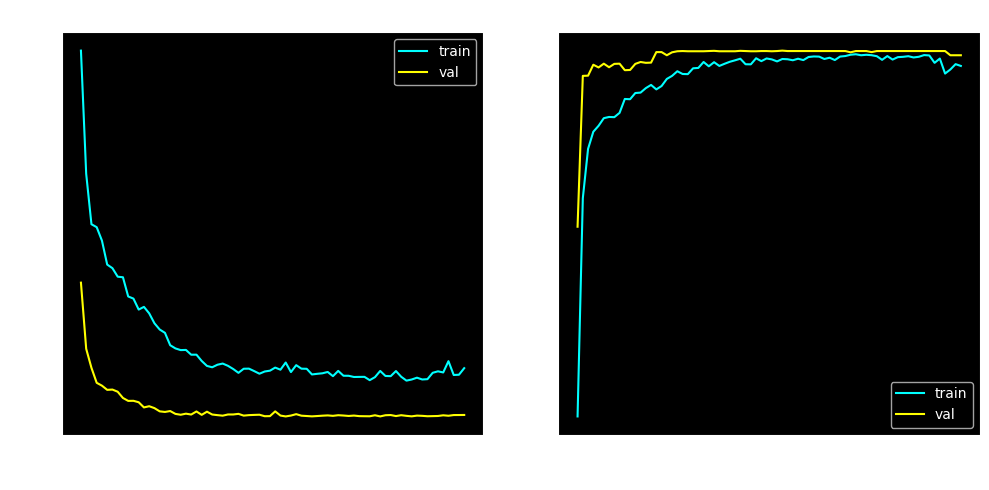

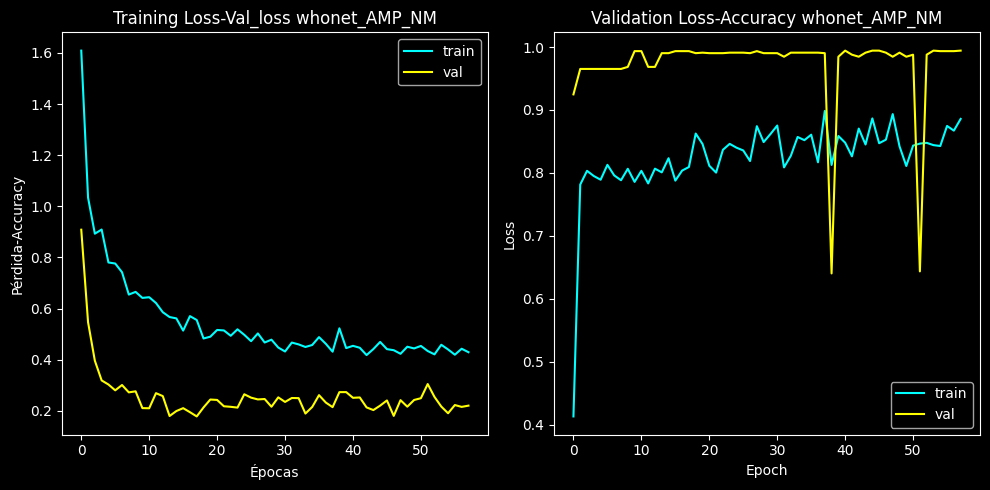

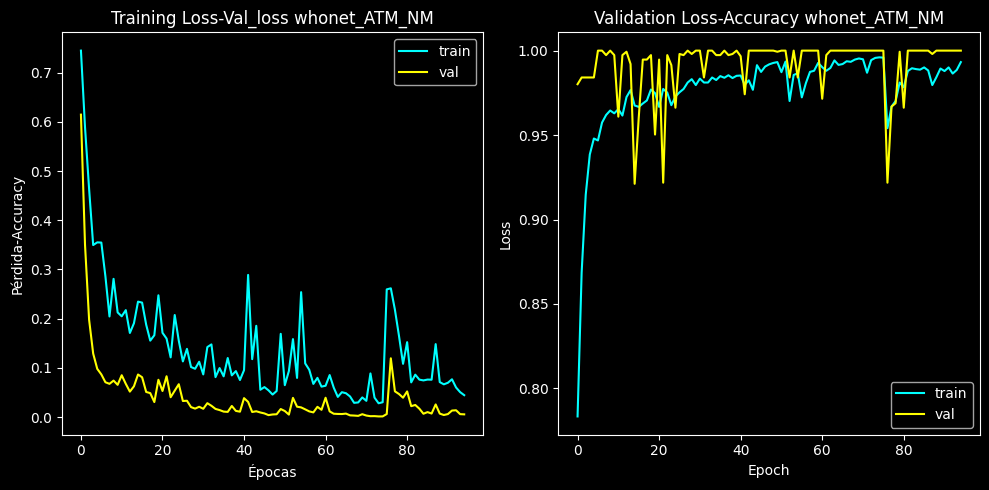

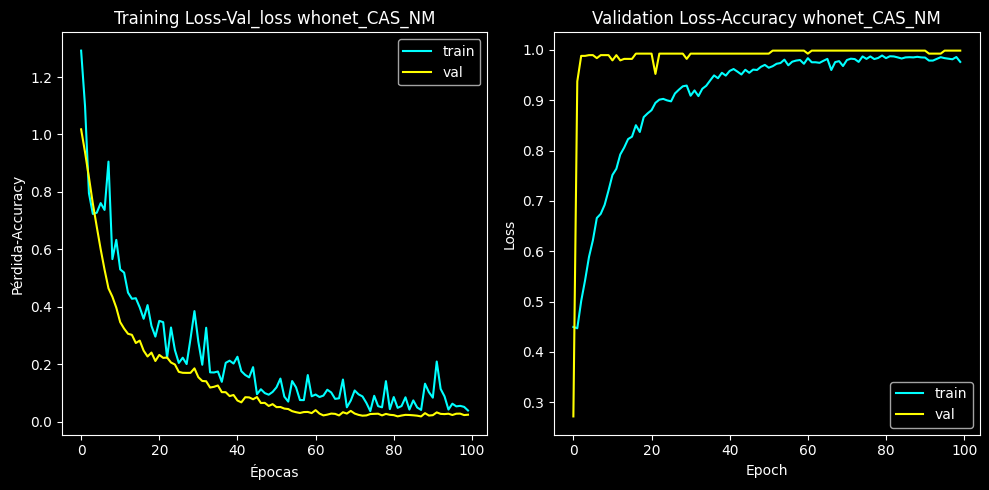

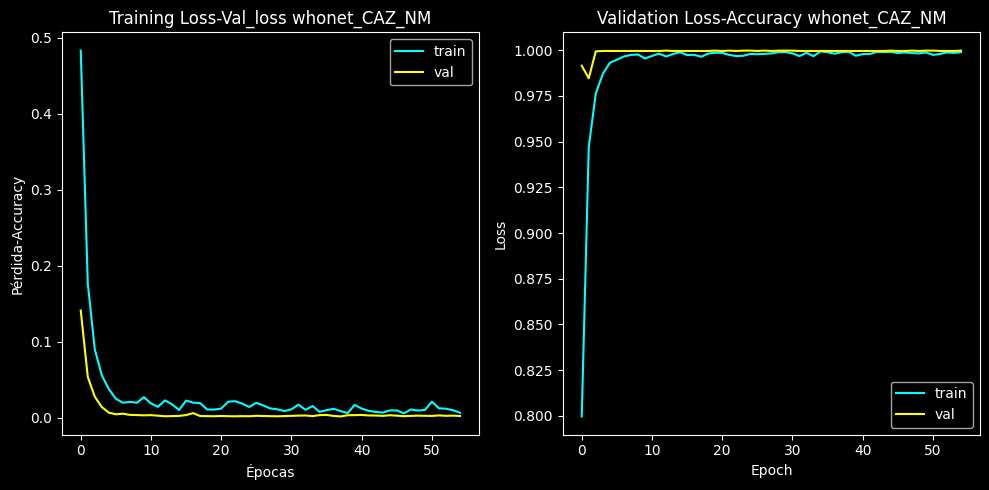

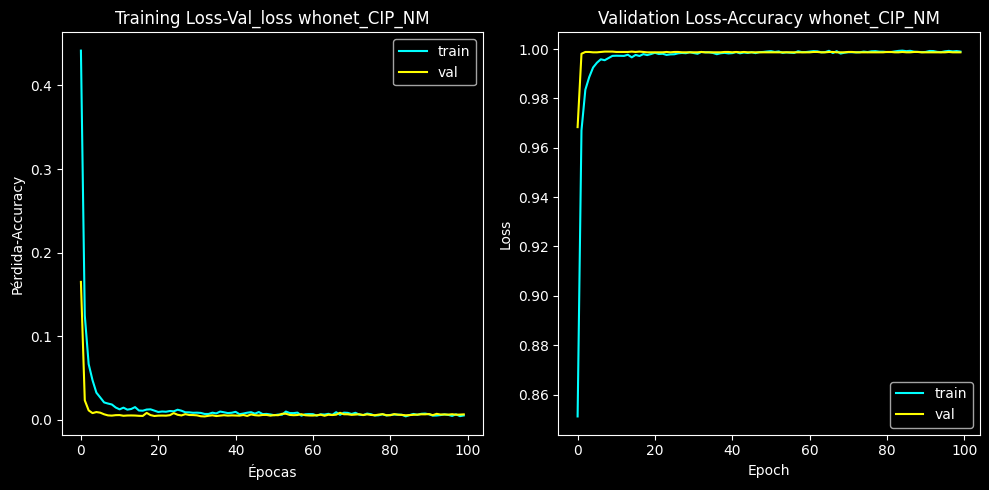

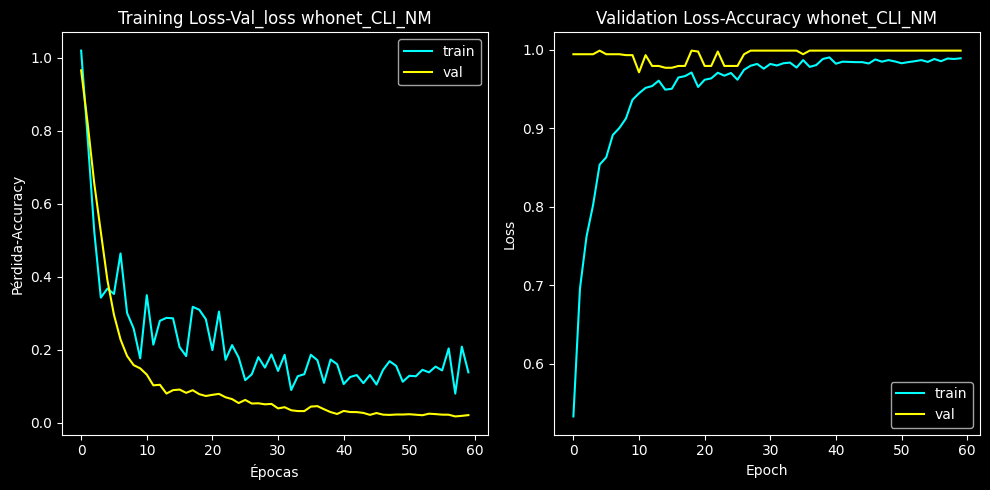

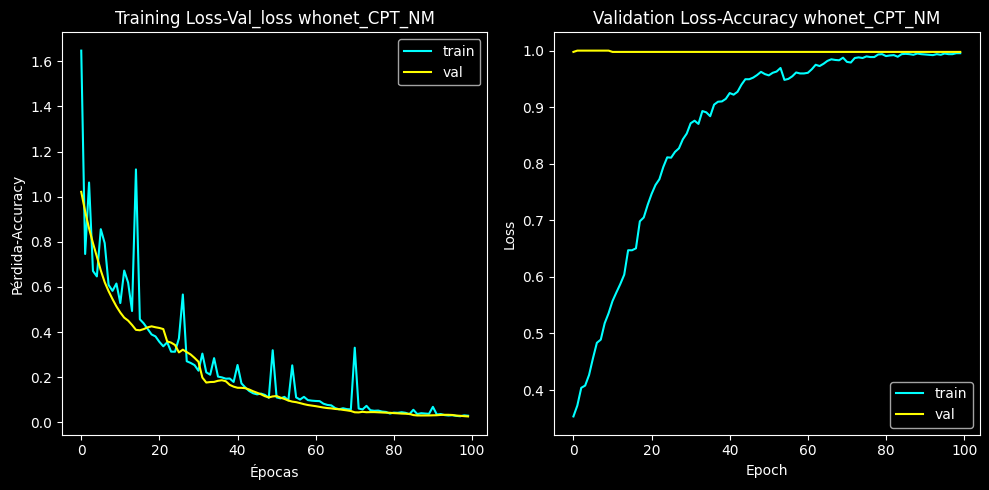

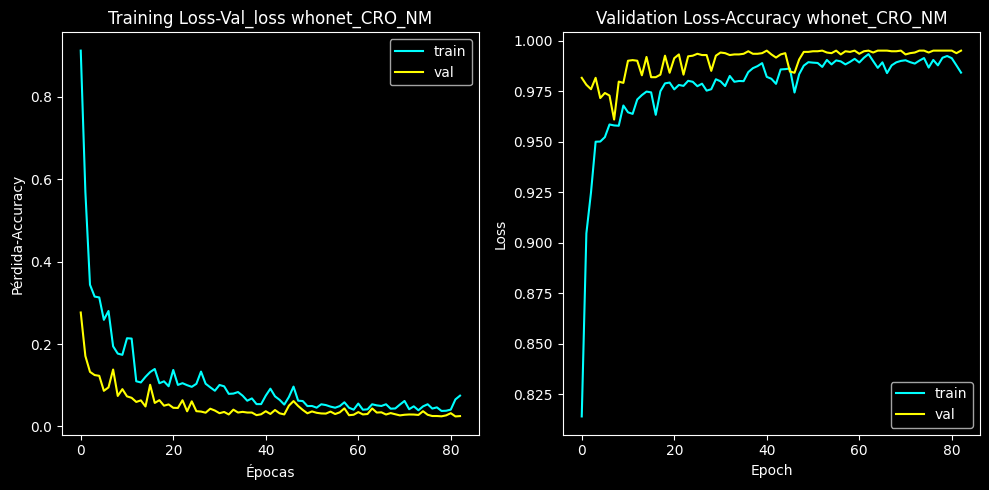

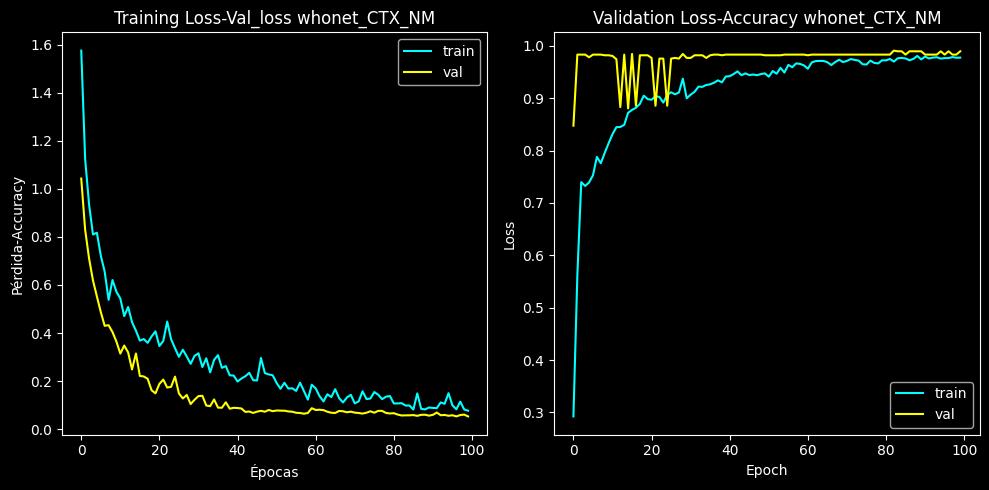

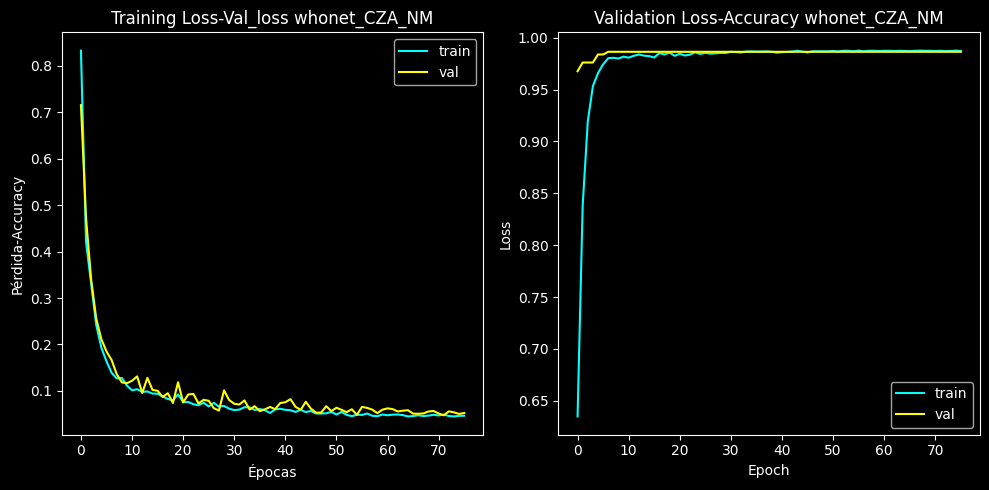

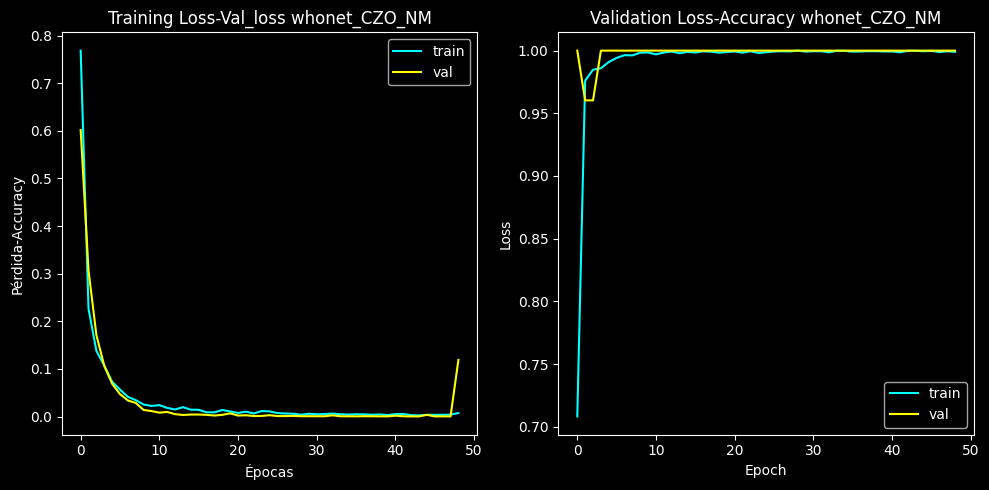

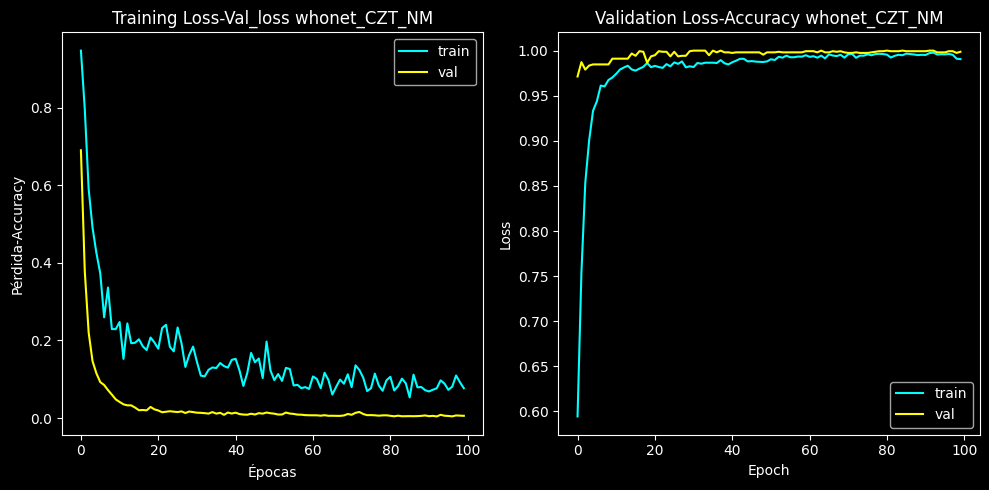

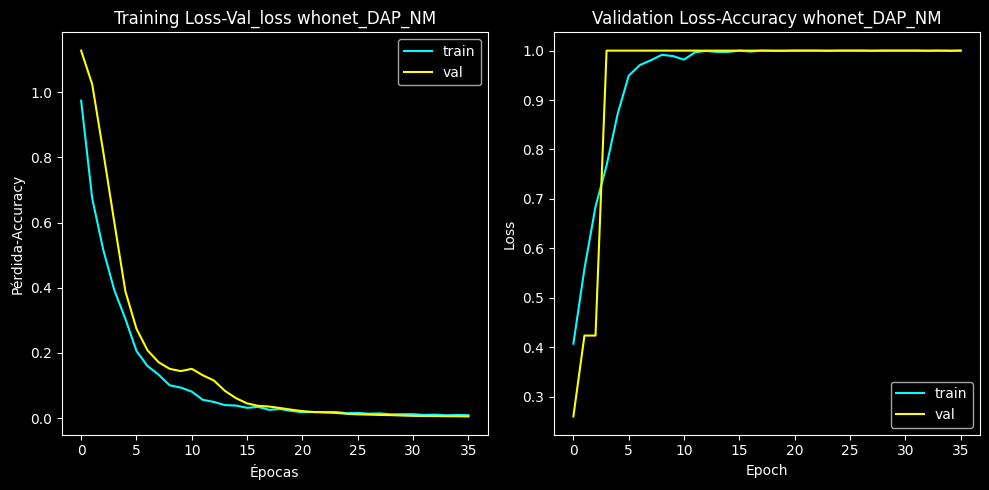

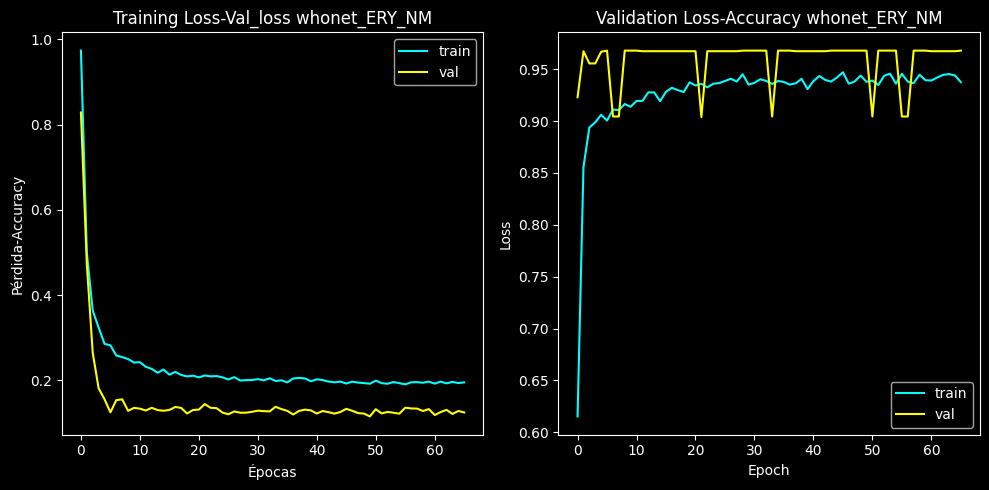

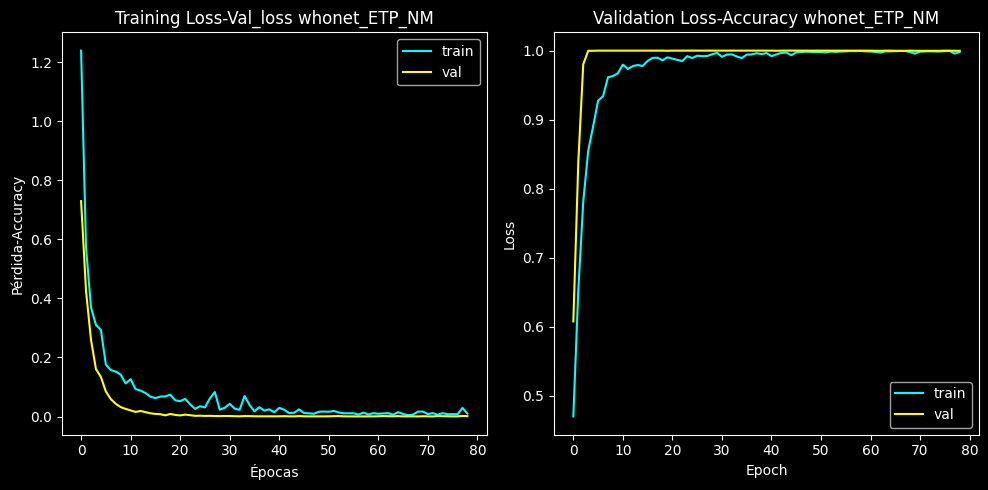

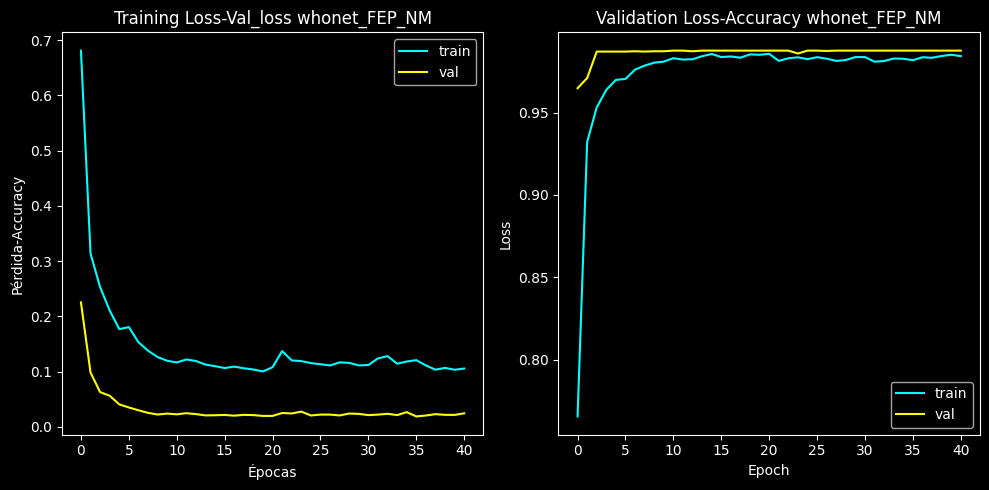

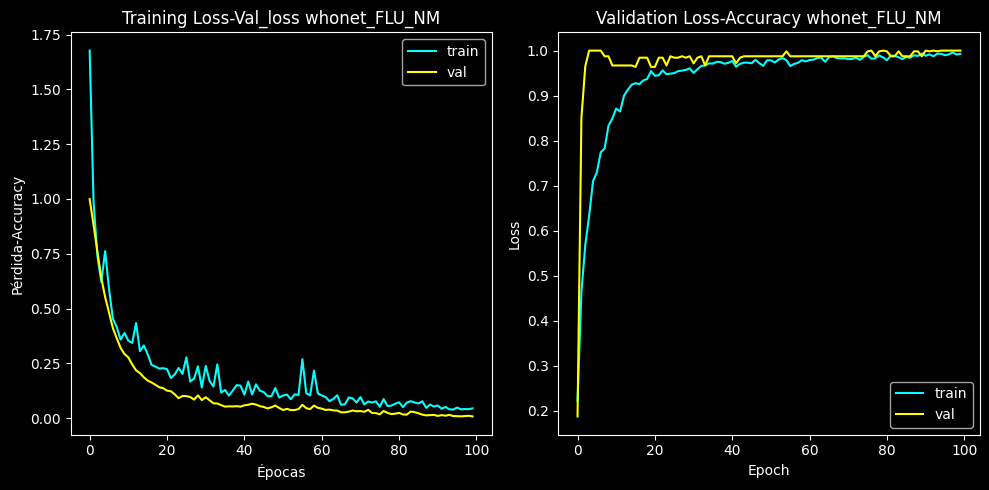

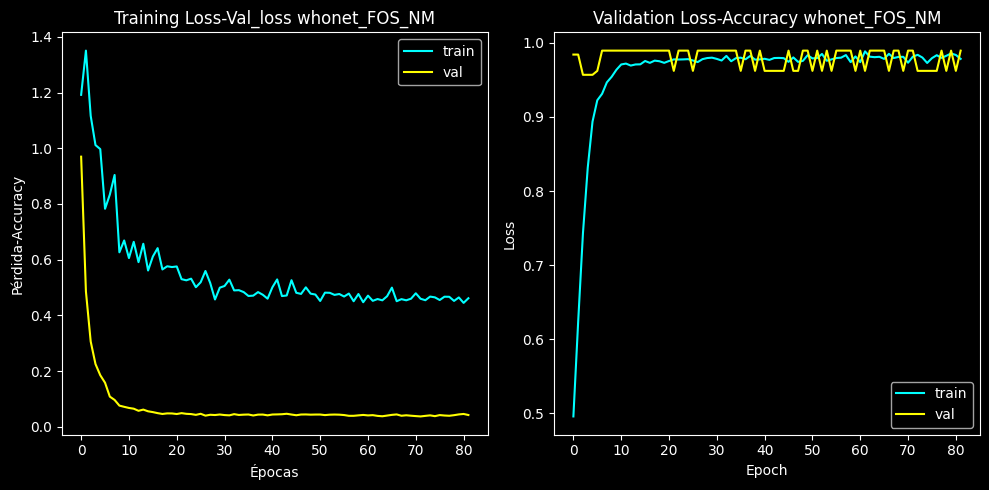

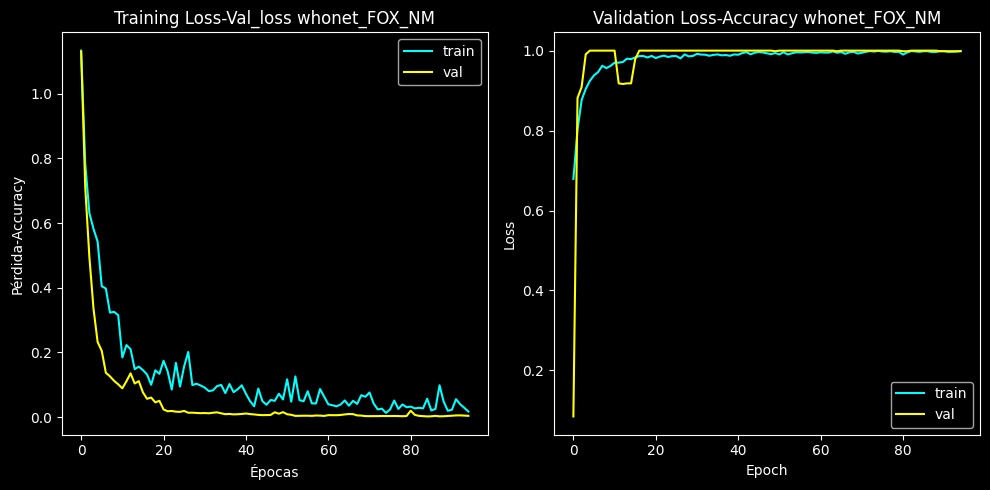

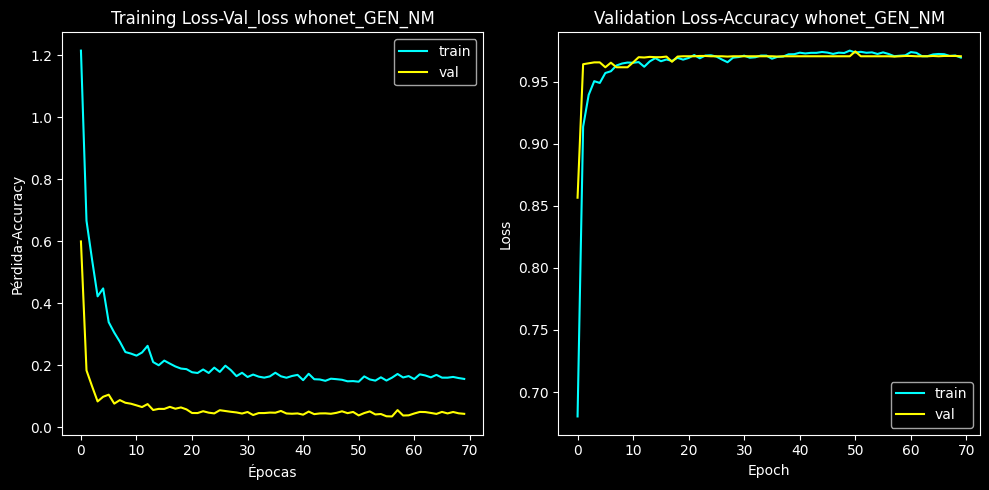

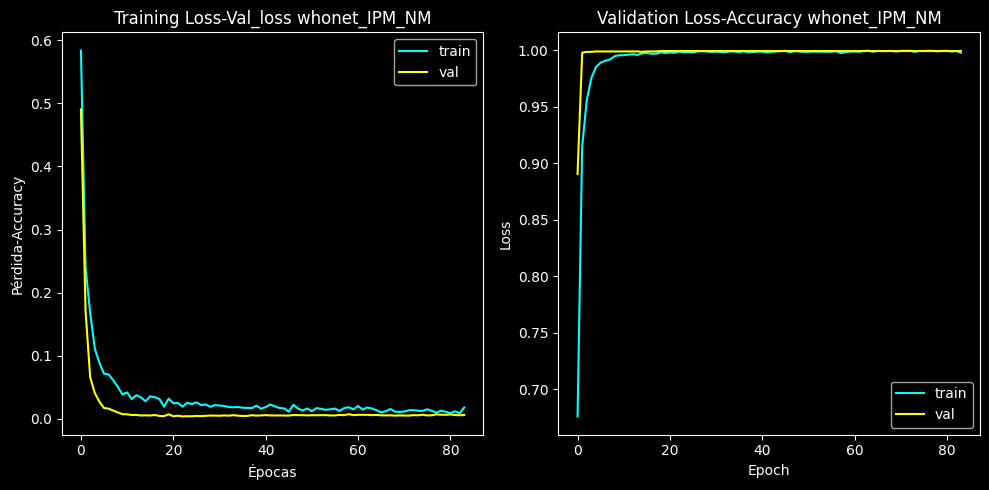

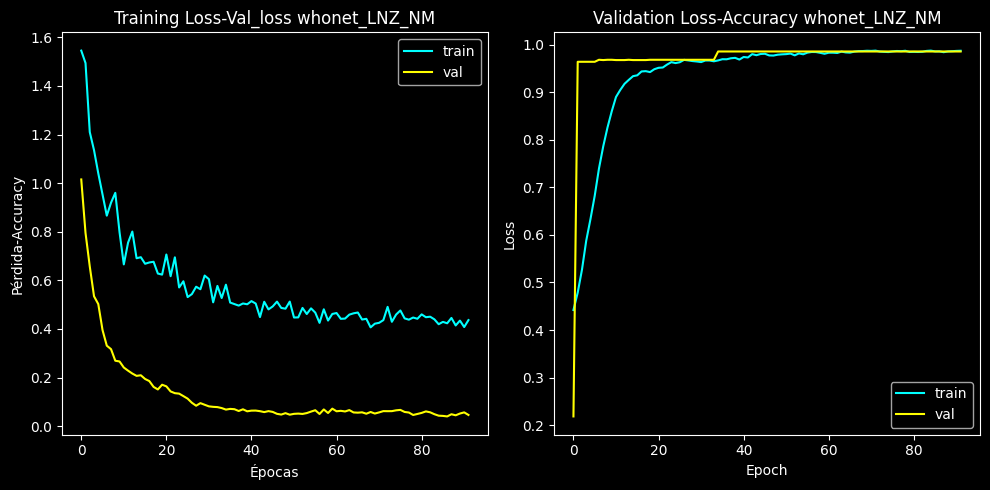

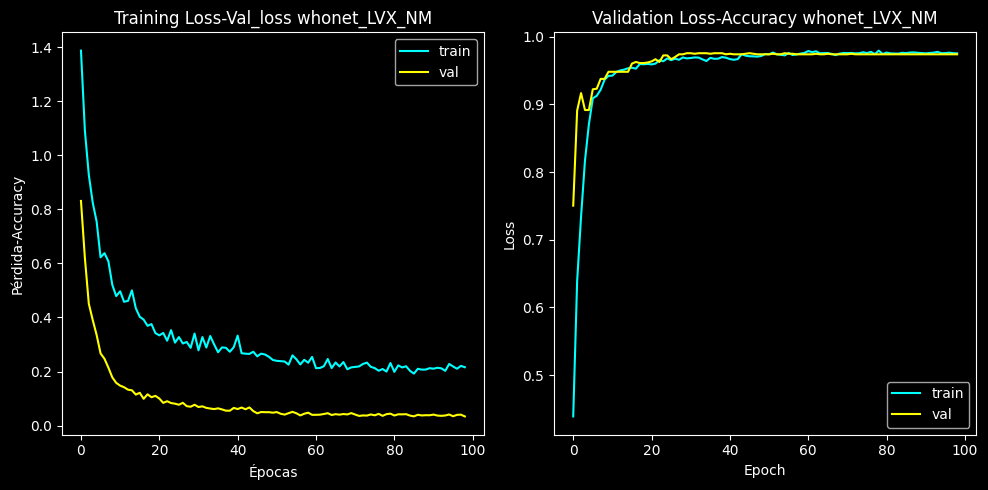

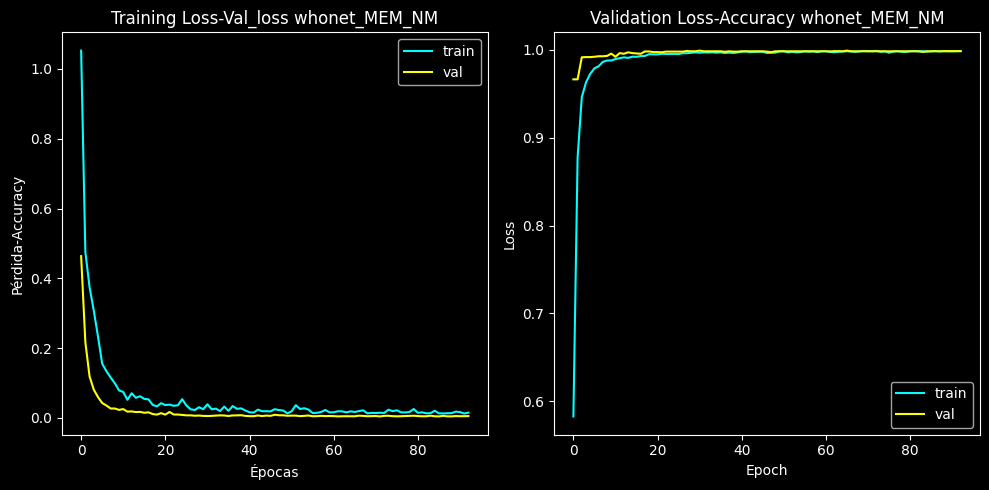

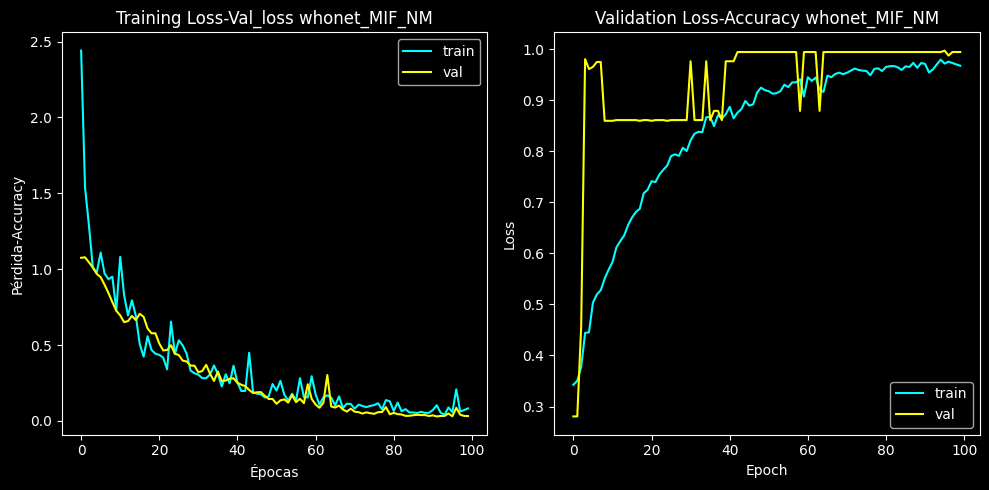

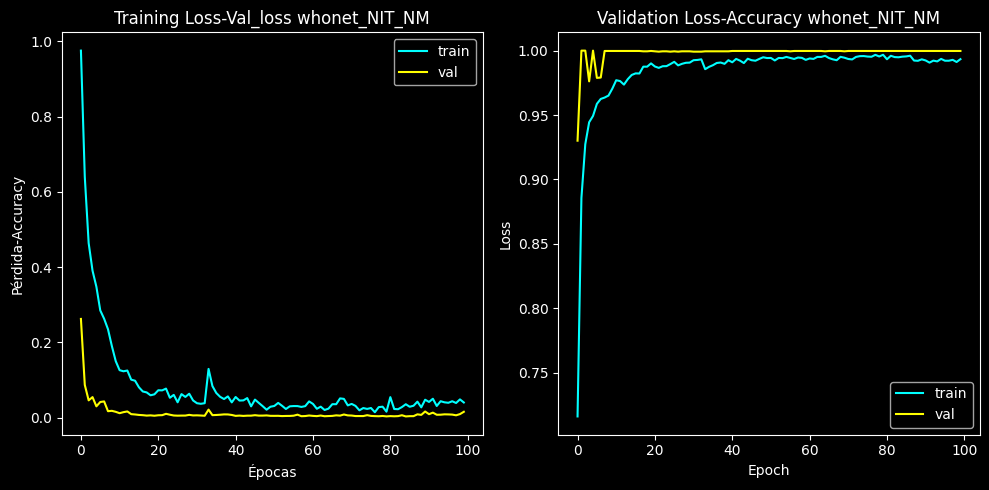

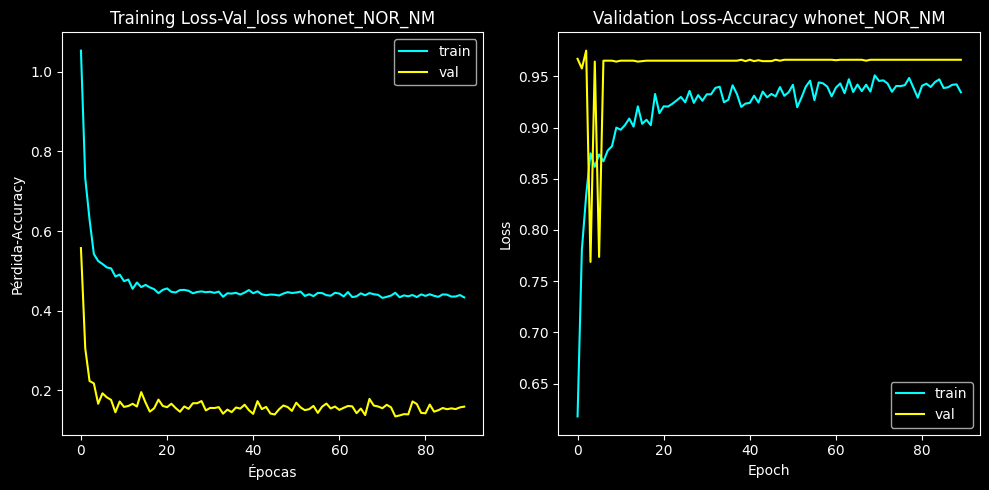

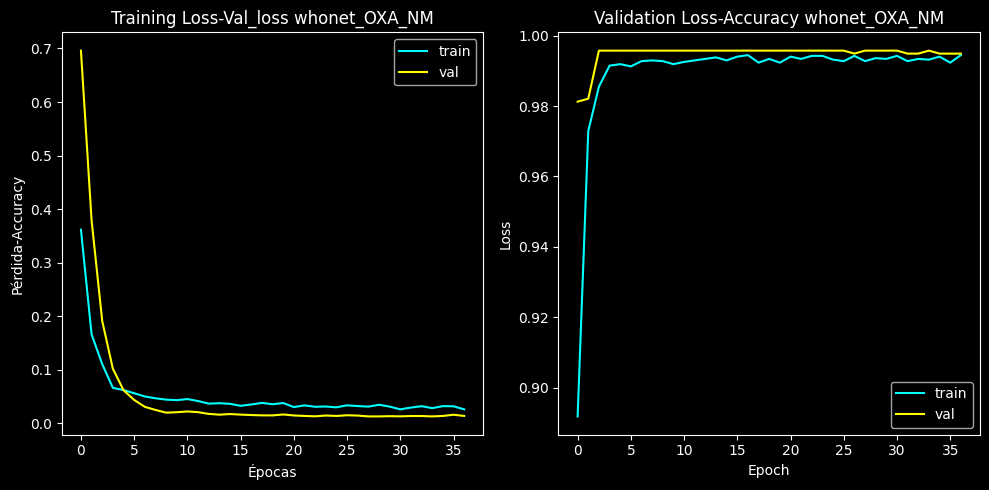

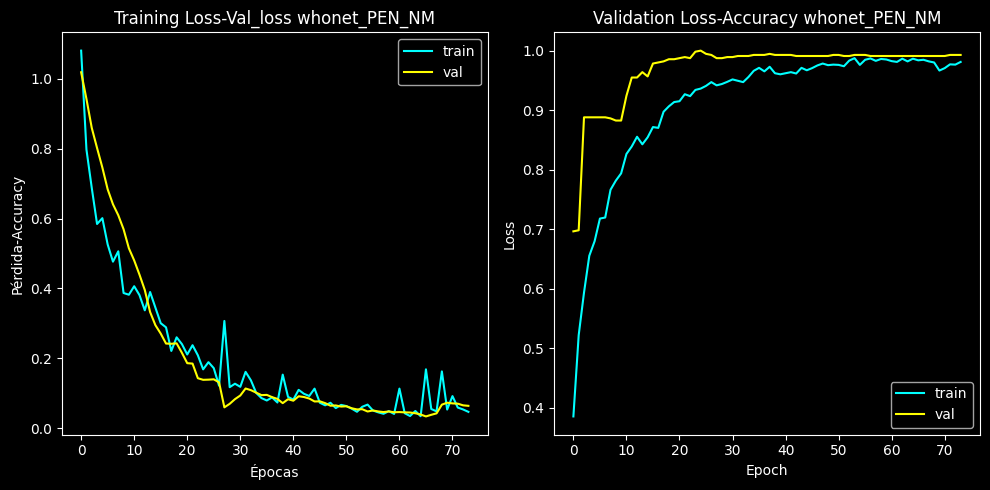

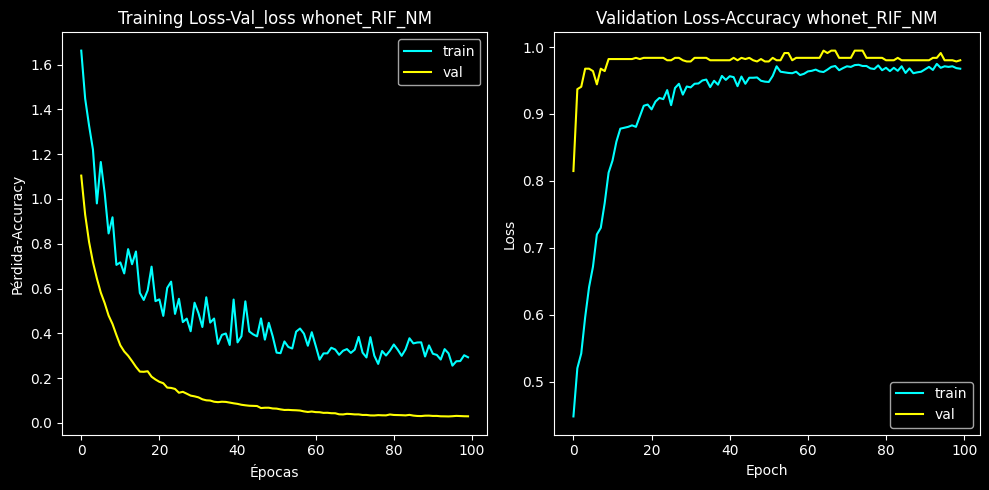

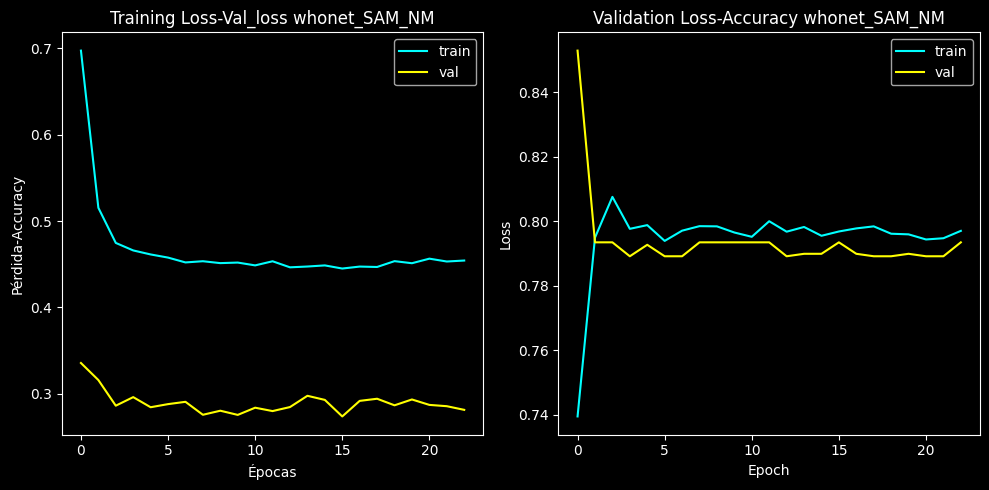

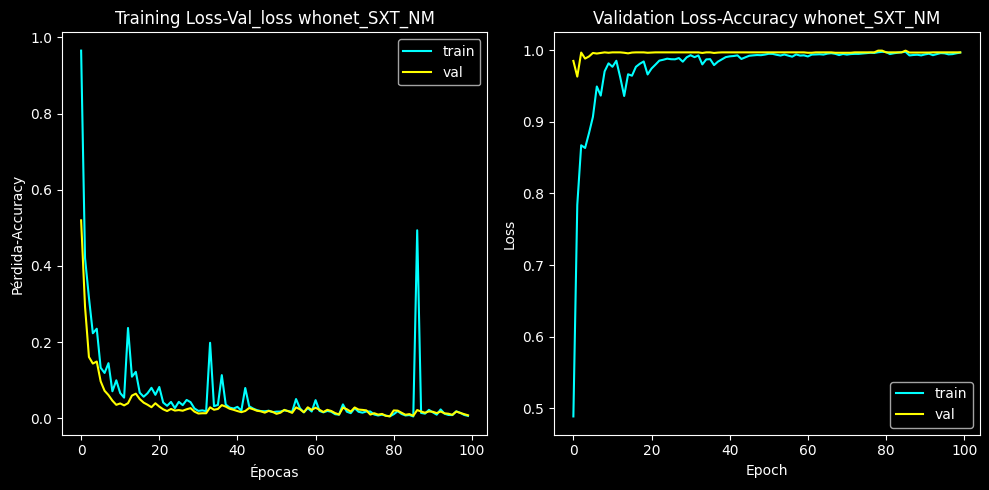

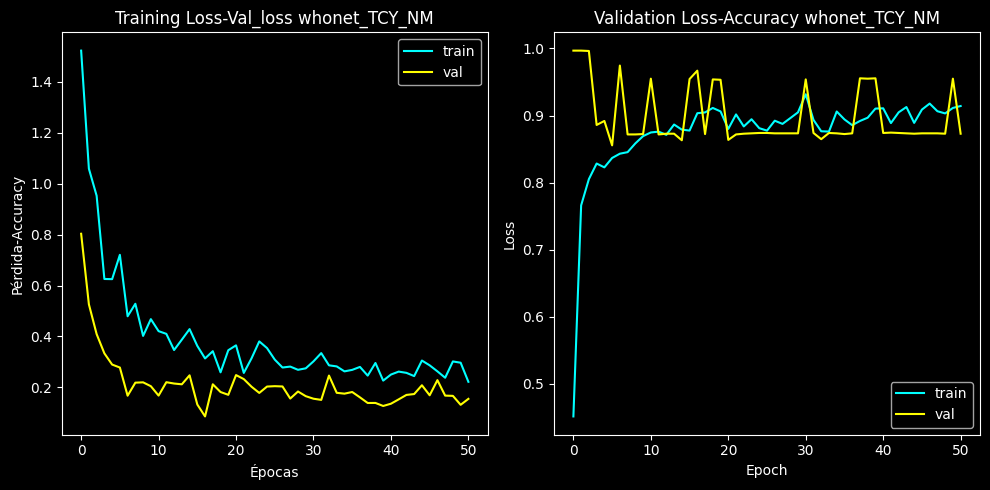

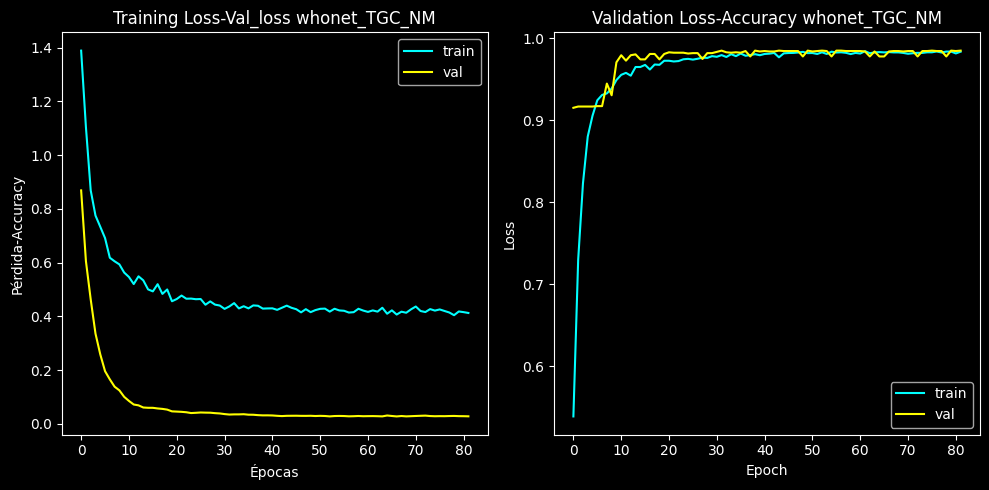

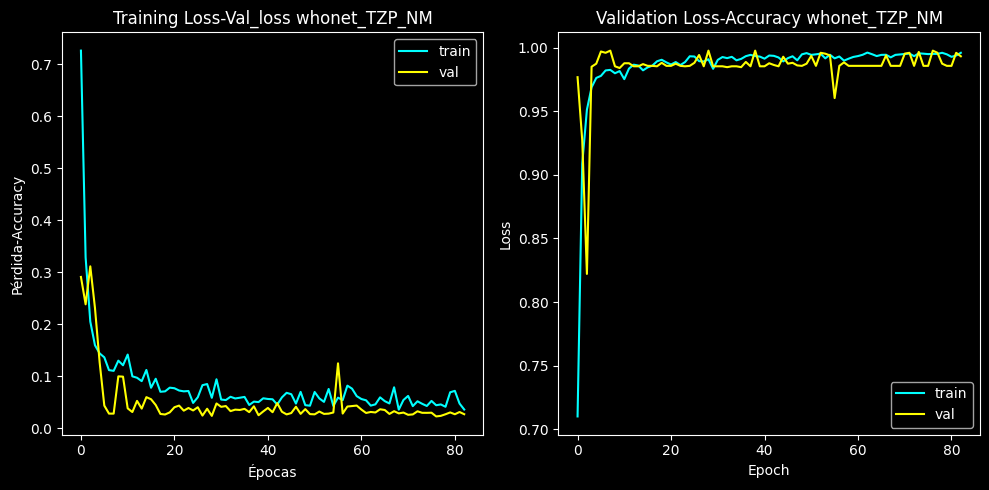

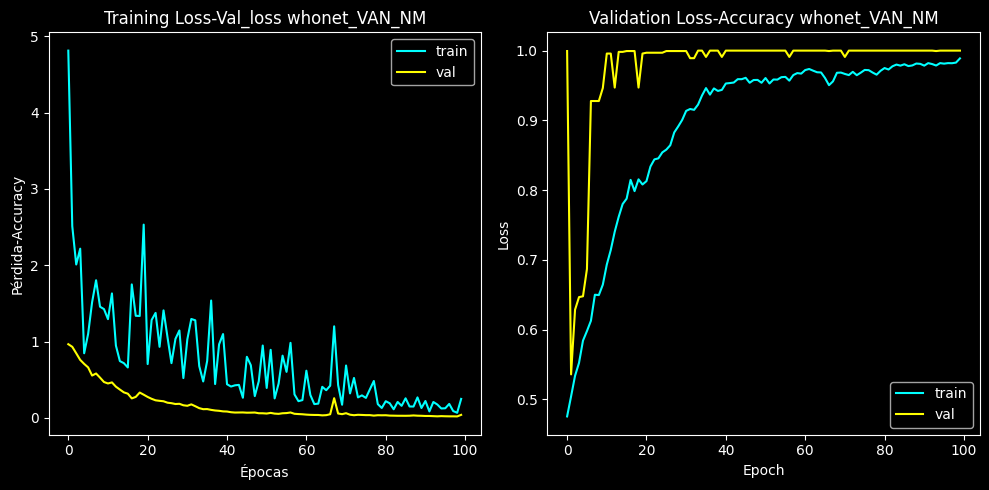

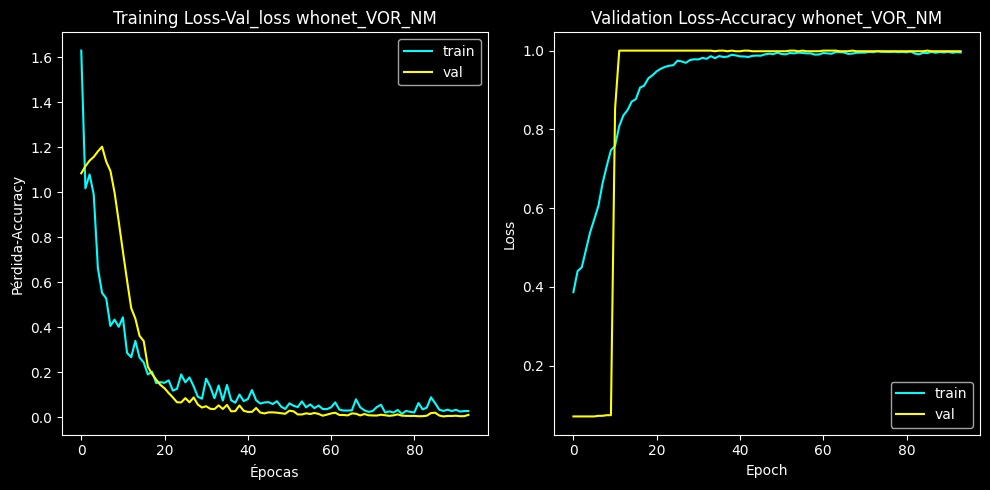

In [ ]:
for nombre, history in histories.items():

  plt.figure(figsize=(10, 5))
  plt.style.use('dark_background')  # Establece fondo negro

  plt.subplot(1, 2, 1)
  plt.plot(history.history["loss"], color='cyan')
  plt.plot(history.history["val_loss"], color='yellow')
  plt.title(f"Training Loss-Val_loss {nombre}")
  plt.xlabel("Épocas")
  plt.ylabel("Pérdida-Accuracy")
  plt.legend(["train", "val"])

  plt.subplot(1, 2, 2)
  plt.style.use('dark_background')  # Establece fondo negro
  plt.plot(history.history["accuracy"], color="cyan")
  plt.plot(history.history["val_accuracy"], color="yellow")
  plt.title(f"Validation Loss-Accuracy {nombre}")
  plt.xlabel("Epoch")
  plt.ylabel("Loss")
  plt.legend(["train", "val"])
  plt.tight_layout()
  plt.show()

## **2. Evaluación o Aplicación del modelo**
---

Si entrenó un modelo, recuerde que debe reportar el desempeño del mismo sobre un conjunto de datos no visto (test). Considere que dispone de las siguientes métricas:

- **Clasificación**: accuracy, precision, recall, f1-score, AUC.
- **Regresión**: $r^2$, error cuadrático medio, error absoluto medio.
- **Agrupamiento**: coeficiente de silueta, índice de Davies-Bouldin.

In [ ]:
"""
le_organismo = LabelEncoder()
le_etiquetas = LabelEncoder()

# Obtenemos probabilidades
probs = model.predict({'LOCAL_ORG': X_test['LOCAL_ORG_id'], 'AMK_NM': X_test['AMK_NM']})
# Obtenemos la clase predicha
pred_ids = np.argmax(probs, axis=1)
#Decodificamos los Ids a las etiquetas originales
pred_labels = le_etiquetas.inverse_transform(pred_ids)  # ← transforma de vuelta a 'sensible', 'intermedio', 'resistente'

X_test['pred_labels'] = pred_labels
X_test['pred_ids'] = pred_ids
X_test['etiquetas']= le_etiquetas.inverse_transform(y_test)
print(X_test.head())

205/205 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
       LOCAL_ORG  AMK_NM pred_labels  pred_ids etiquetas etiquetas_predichas
28723         31    16.0           R         1         R                   R
16154         47     2.0           S         2         S                   S
42942         25     8.0           I         0         I                   I
15768         24     1.0           S         2         S                   S
6213          25     2.0           S         2         S                   S
✅ Accuracy: 0.9985

📊 Matriz de Confusión:
[[  72    9    0]
 [   0  325    0]
 [   0    1 6127]]


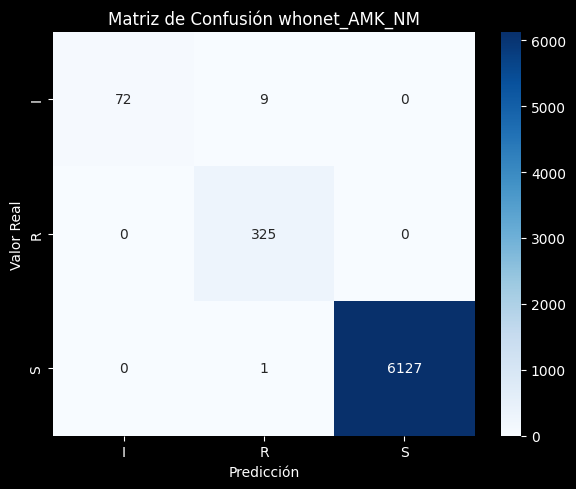


Reporte para: whonet_AMK_NM
              precision    recall  f1-score   support

           I       1.00      0.89      0.94        81
           R       0.97      1.00      0.98       325
           S       1.00      1.00      1.00      6128

    accuracy                           1.00      6534
   macro avg       0.99      0.96      0.98      6534
weighted avg       1.00      1.00      1.00      6534

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  AMP_NM pred_labels  pred_ids etiquetas etiquetas_predichas
7568           3    2.00           S         2         S                   S
19013          8    2.00           S         2         S                   S
14836         20    0.25           I         0         S                   S
4185           3    2.00           S         2         S                   S
30387          0    2.00           S         2         S                   S
✅ Accuracy: 0.9903

📊 Matriz de Confusión:
[[  2  14   0]
 [  0 584   0]
 [  1   0 946]]


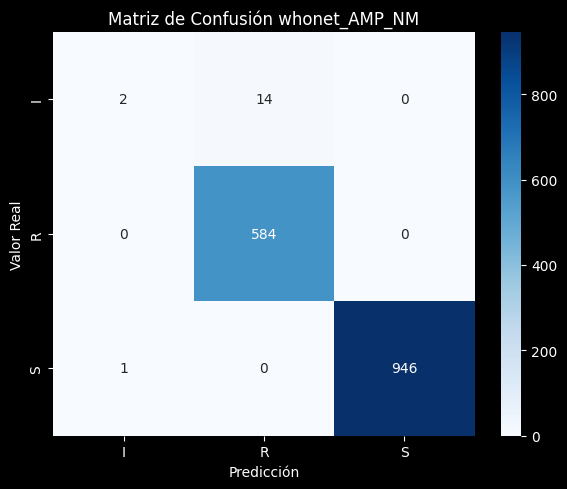


Reporte para: whonet_AMP_NM
              precision    recall  f1-score   support

           I       0.67      0.12      0.21        16
           R       0.98      1.00      0.99       584
           S       1.00      1.00      1.00       947

    accuracy                           0.99      1547
   macro avg       0.88      0.71      0.73      1547
weighted avg       0.99      0.99      0.99      1547

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  ATM_NM pred_labels  pred_ids etiquetas etiquetas_predichas
13721         20     1.0           S         2         S                   S
14688         16     1.0           S         2         S                   S
37018         21    32.0           R         1         R                   R
16901         26     1.0           S         2         S                   S
20012          8     1.0           S         2         S                   S
✅ Accuracy: 0.9995

📊 Matriz de Confusión:
[[  10    0    0]
 [   0  329    0]
 [   1    

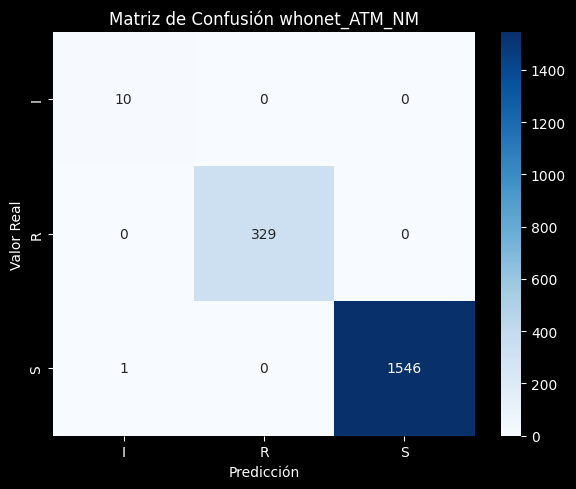


Reporte para: whonet_ATM_NM
              precision    recall  f1-score   support

           I       0.91      1.00      0.95        10
           R       1.00      1.00      1.00       329
           S       1.00      1.00      1.00      1547

    accuracy                           1.00      1886
   macro avg       0.97      1.00      0.98      1886
weighted avg       1.00      1.00      1.00      1886

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       LOCAL_ORG  CAS_NM pred_labels  pred_ids etiquetas etiquetas_predichas
23101          0    0.12           S         2         S                   S
45133          0    0.12           S         2         S                   S
21200          2    2.00           S         2         S                   S
4418           0    0.12           S         2         S                   S
20875          0    0.12           S         2         S                   S
✅ Accuracy: 0.9976

📊 Matriz de Confusión:
[[  4   0   0]
 [  0   8   0]
 [  1   1 824]]

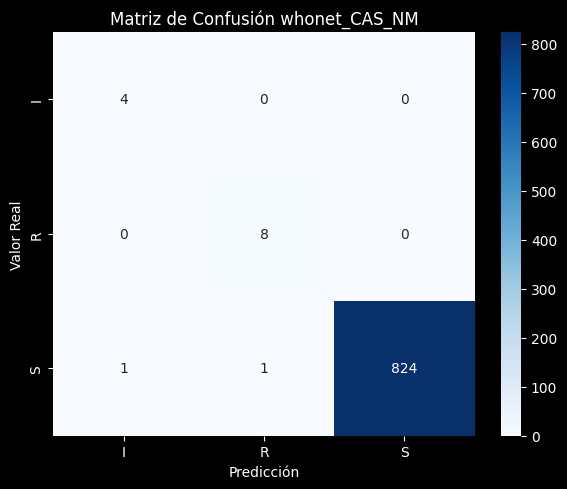


Reporte para: whonet_CAS_NM
              precision    recall  f1-score   support

           I       0.80      1.00      0.89         4
           R       0.89      1.00      0.94         8
           S       1.00      1.00      1.00       826

    accuracy                           1.00       838
   macro avg       0.90      1.00      0.94       838
weighted avg       1.00      1.00      1.00       838

205/205 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  CAZ_NM pred_labels  pred_ids etiquetas etiquetas_predichas
48316         29    1.00           S         2         S                   S
4290          23    1.00           S         2         S                   S
43213         22    0.25           S         2         S                   S
47441         23    0.12           S         2         S                   S
27790         45    2.00           S         2         S                   S
✅ Accuracy: 0.9998

📊 Matriz de Confusión:
[[ 272    0    0]
 [   0  810    0]
 [   1  

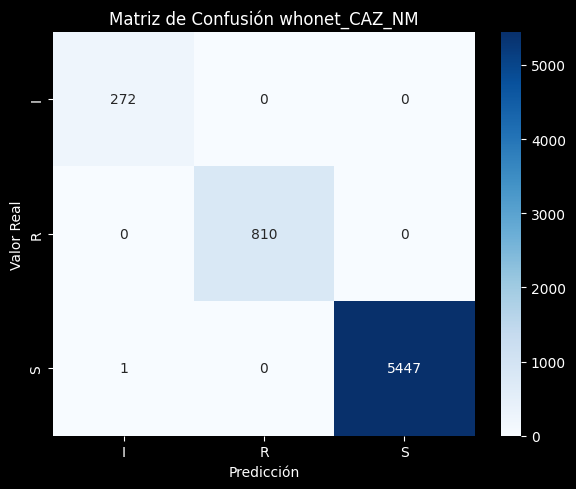


Reporte para: whonet_CAZ_NM
              precision    recall  f1-score   support

           I       1.00      1.00      1.00       272
           R       1.00      1.00      1.00       810
           S       1.00      1.00      1.00      5448

    accuracy                           1.00      6530
   macro avg       1.00      1.00      1.00      6530
weighted avg       1.00      1.00      1.00      6530

270/270 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
       LOCAL_ORG  CIP_NM pred_labels  pred_ids etiquetas etiquetas_predichas
44571         44    0.25           S         2         S                   S
14220         39    0.06           S         2         S                   S
34337         29    0.50           I         0         I                   I
20299          3    0.25           S         2         S                   S
43333         72    4.00           R         1         R                   R
✅ Accuracy: 0.9991

📊 Matriz de Confusión:
[[ 603    0    1]
 [   4 2084    2]
 [   1  

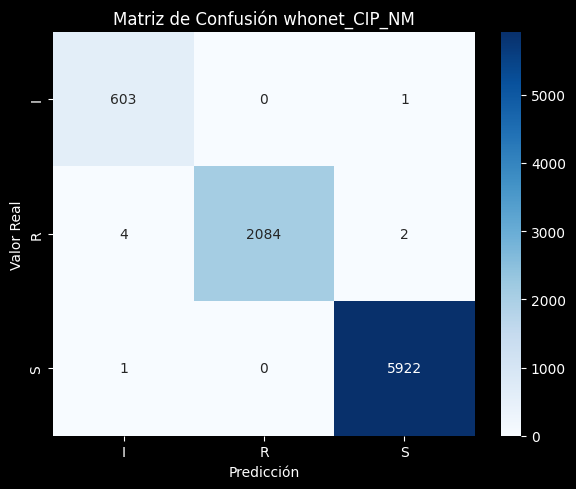


Reporte para: whonet_CIP_NM
              precision    recall  f1-score   support

           I       0.99      1.00      1.00       604
           R       1.00      1.00      1.00      2090
           S       1.00      1.00      1.00      5923

    accuracy                           1.00      8617
   macro avg       1.00      1.00      1.00      8617
weighted avg       1.00      1.00      1.00      8617

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  CLI_NM pred_labels  pred_ids etiquetas etiquetas_predichas
30195          0    0.25           S         2         S                   S
44092          0    0.25           S         2         S                   S
20312          5    0.12           S         2         S                   S
29475          0    0.25           S         2         S                   S
7119           0    0.25           S         2         S                   S
✅ Accuracy: 0.9972

📊 Matriz de Confusión:
[[  4   1   1]
 [  0 155   0]
 [  1   0 926]]


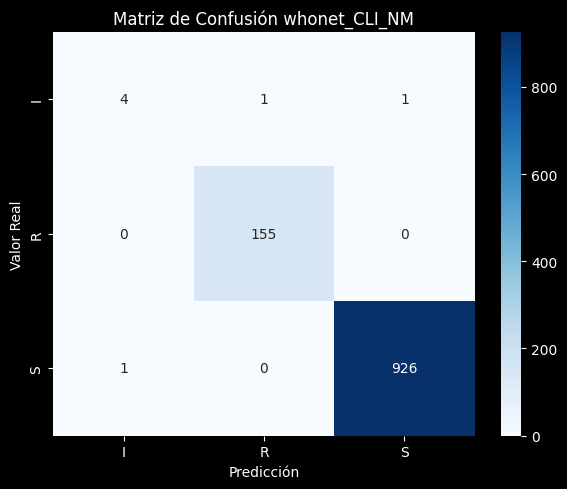


Reporte para: whonet_CLI_NM
              precision    recall  f1-score   support

           I       0.80      0.67      0.73         6
           R       0.99      1.00      1.00       155
           S       1.00      1.00      1.00       927

    accuracy                           1.00      1088
   macro avg       0.93      0.89      0.91      1088
weighted avg       1.00      1.00      1.00      1088

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
       LOCAL_ORG  CPT_NM pred_labels  pred_ids etiquetas etiquetas_predichas
24728          0    0.50           R         1         R                   R
18707          0    0.25           R         1         R                   R
37495          0    0.50           R         1         R                   R
38520          0    0.25           R         1         R                   R
8033           0    0.25           R         1         R                   R
✅ Accuracy: 0.9964

📊 Matriz de Confusión:
[[  0   0   0]
 [  2 548   0]
 [  0   0   0]]

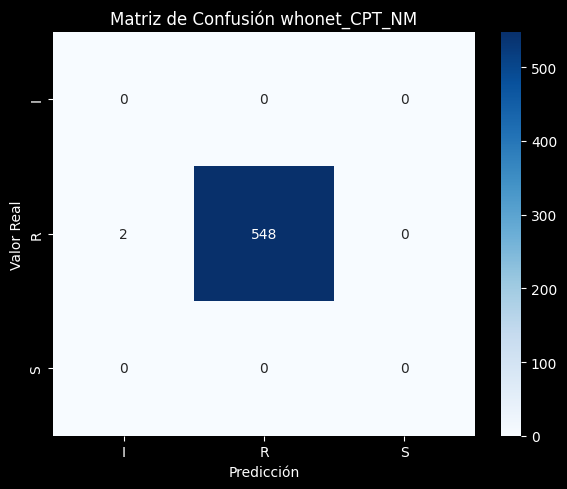


Reporte para: whonet_CPT_NM
              precision    recall  f1-score   support

           I       0.00      0.00      0.00         0
           R       1.00      1.00      1.00       550

    accuracy                           1.00       550
   macro avg       0.50      0.50      0.50       550
weighted avg       1.00      1.00      1.00       550

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  CRO_NM pred_labels  pred_ids etiquetas etiquetas_predichas
10828         19    0.25           S         2         S                   S
25262         19    0.25           S         2         S                   S
4449          50    0.25           S         2         S                   S
22662         19    0.25           S         2         S                   S
29959         25    1.00           S         2         S                   S
✅ Accuracy: 0.9932

📊 Matriz de Confusión:
[[  31    2    0]
 [  16  799    0]
 [   8    1 3141]]


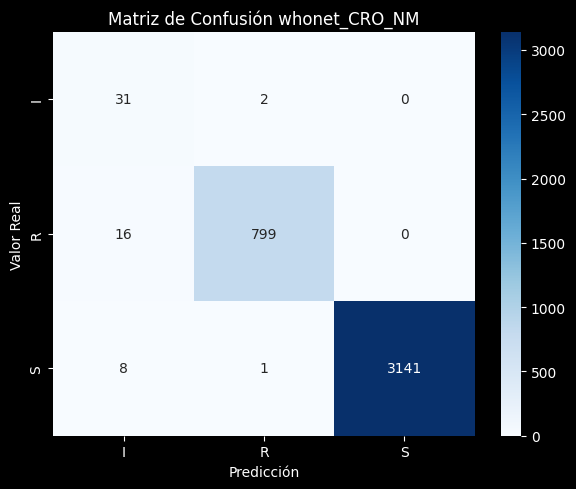


Reporte para: whonet_CRO_NM
              precision    recall  f1-score   support

           I       0.56      0.94      0.70        33
           R       1.00      0.98      0.99       815
           S       1.00      1.00      1.00      3150

    accuracy                           0.99      3998
   macro avg       0.85      0.97      0.90      3998
weighted avg       1.00      0.99      0.99      3998

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       LOCAL_ORG  CTX_NM pred_labels  pred_ids etiquetas etiquetas_predichas
16735         10     1.0           S         2         S                   S
37022         10     1.0           S         2         S                   S
24933         10     1.0           S         2         S                   S
21981         10     1.0           S         2         S                   S
7531          10    32.0           R         1         R                   R
✅ Accuracy: 0.9888

📊 Matriz de Confusión:
[[  4   0   0]
 [  5 163   0]
 [  6   0 808]]

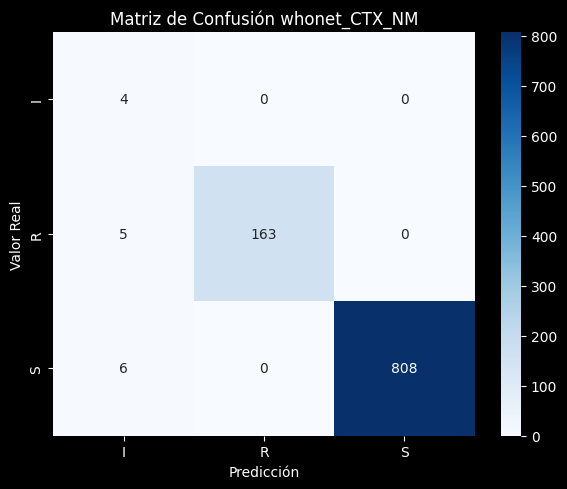


Reporte para: whonet_CTX_NM
              precision    recall  f1-score   support

           I       0.27      1.00      0.42         4
           R       1.00      0.97      0.98       168
           S       1.00      0.99      1.00       814

    accuracy                           0.99       986
   macro avg       0.76      0.99      0.80       986
weighted avg       1.00      0.99      0.99       986

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  CZA_NM pred_labels  pred_ids etiquetas etiquetas_predichas
45891         11    0.12           R         1         R                   R
3039          15    0.12           R         1         R                   R
5854          10    0.25           R         1         R                   R
40532         29    2.00           R         1         R                   R
24839         29    2.00           R         1         R                   R
✅ Accuracy: 0.9850

📊 Matriz de Confusión:
[[ 116    1    0]
 [  28 1790    0]
 [   0    

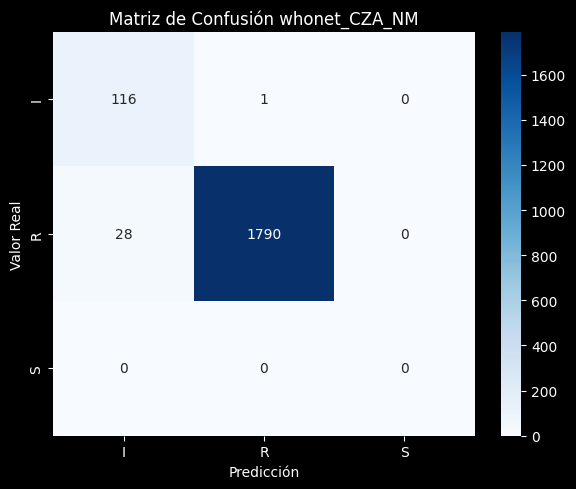


Reporte para: whonet_CZA_NM
              precision    recall  f1-score   support

           I       0.81      0.99      0.89       117
           R       1.00      0.98      0.99      1818

    accuracy                           0.99      1935
   macro avg       0.90      0.99      0.94      1935
weighted avg       0.99      0.99      0.99      1935

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  CZO_NM pred_labels  pred_ids etiquetas etiquetas_predichas
14851          6    32.0           R         1         R                   R
42903          6     4.0           I         0         I                   I
3790          14     4.0           I         0         I                   I
8571           6     8.0           R         1         R                   R
6031           9     4.0           I         0         I                   I
✅ Accuracy: 1.0000

📊 Matriz de Confusión:
[[1380    0    0]
 [   0  510    0]
 [   0    0    0]]


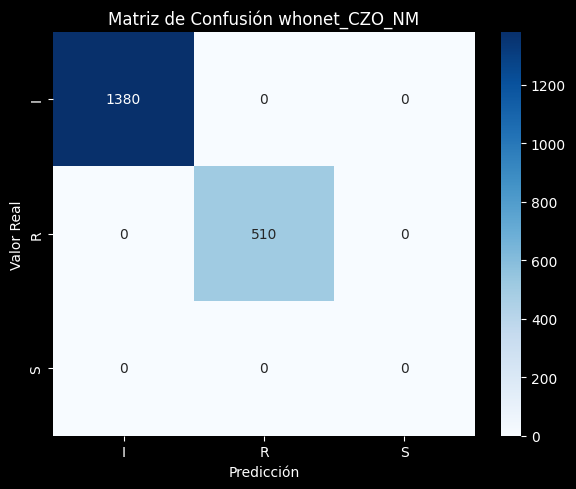


Reporte para: whonet_CZO_NM
              precision    recall  f1-score   support

           I       1.00      1.00      1.00      1380
           R       1.00      1.00      1.00       510

    accuracy                           1.00      1890
   macro avg       1.00      1.00      1.00      1890
weighted avg       1.00      1.00      1.00      1890

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  CZT_NM pred_labels  pred_ids etiquetas etiquetas_predichas
31814         11    0.25           S         2         S                   S
38643         13    0.25           S         2         S                   S
19899          4   16.00           R         1         R                   R
14133         10    0.25           S         2         S                   S
14368         14    0.25           S         2         S                   S
✅ Accuracy: 1.0000

📊 Matriz de Confusión:
[[  11    0    0]
 [   0  207    0]
 [   0    0 1743]]


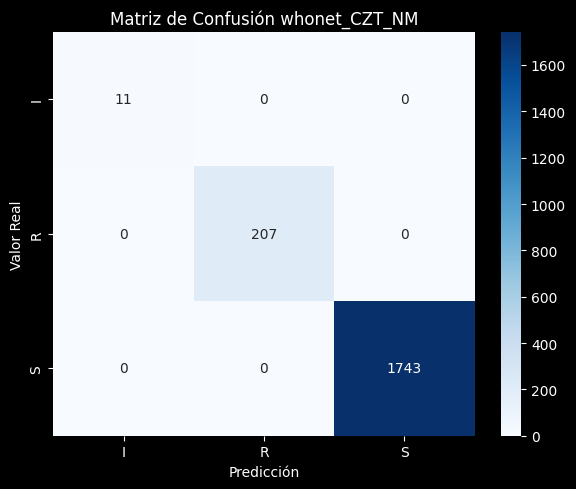


Reporte para: whonet_CZT_NM
              precision    recall  f1-score   support

           I       1.00      1.00      1.00        11
           R       1.00      1.00      1.00       207
           S       1.00      1.00      1.00      1743

    accuracy                           1.00      1961
   macro avg       1.00      1.00      1.00      1961
weighted avg       1.00      1.00      1.00      1961

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
       LOCAL_ORG  DAP_NM pred_labels  pred_ids etiquetas etiquetas_predichas
12967          0     2.0           R         1         R                   R
2232           0     4.0           I         0         I                   I
30316          0     2.0           R         1         R                   R
33579          0     2.0           R         1         R                   R
13891          0     2.0           R         1         R                   R
✅ Accuracy: 1.0000

📊 Matriz de Confusión:
[[105   0   0]
 [  0 376   0]
 [  0   0   0]]

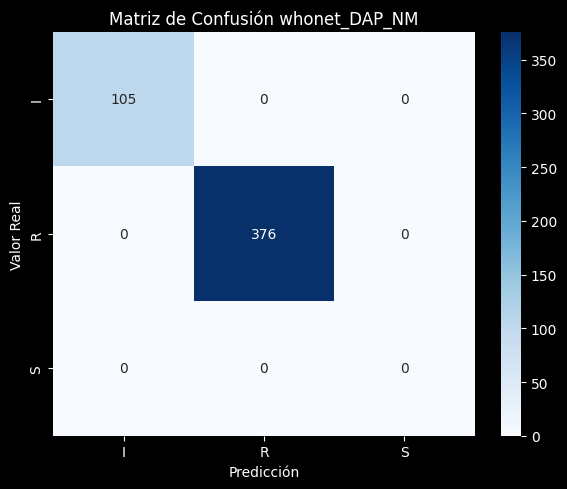


Reporte para: whonet_DAP_NM
              precision    recall  f1-score   support

           I       1.00      1.00      1.00       105
           R       1.00      1.00      1.00       376

    accuracy                           1.00       481
   macro avg       1.00      1.00      1.00       481
weighted avg       1.00      1.00      1.00       481

70/70 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
       LOCAL_ORG  ERY_NM pred_labels  pred_ids etiquetas etiquetas_predichas
7018           3    4.00           R         1         I                   I
14722          4    4.00           R         1         R                   R
21728          3    0.50           S         2         S                   S
39495          6    0.25           S         2         S                   S
32723          6    4.00           R         1         R                   R
✅ Accuracy: 0.9577

📊 Matriz de Confusión:
[[ 209   92    0]
 [   2  847    0]
 [   0    0 1074]]


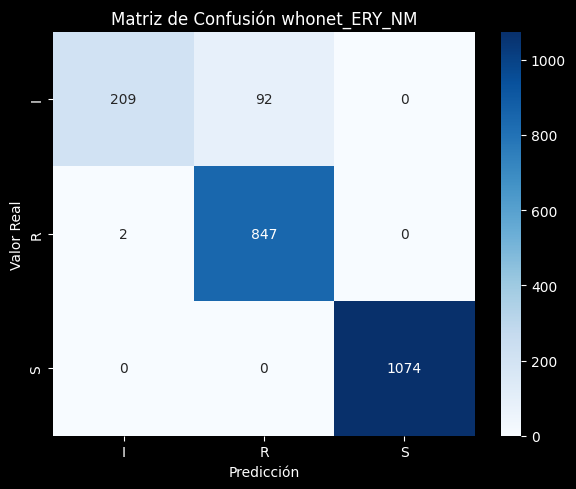


Reporte para: whonet_ERY_NM
              precision    recall  f1-score   support

           I       0.99      0.69      0.82       301
           R       0.90      1.00      0.95       849
           S       1.00      1.00      1.00      1074

    accuracy                           0.96      2224
   macro avg       0.96      0.90      0.92      2224
weighted avg       0.96      0.96      0.96      2224

174/174 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  ETP_NM pred_labels  pred_ids etiquetas etiquetas_predichas
46159         11    0.50           S         2         S                   S
18054         16    0.12           S         2         S                   S
22652         17    0.12           S         2         S                   S
38766         17    0.50           S         2         S                   S
20240         11    0.12           S         2         S                   S
✅ Accuracy: 0.9998

📊 Matriz de Confusión:
[[  18    1    0]
 [   0  244    0]
 [   0  

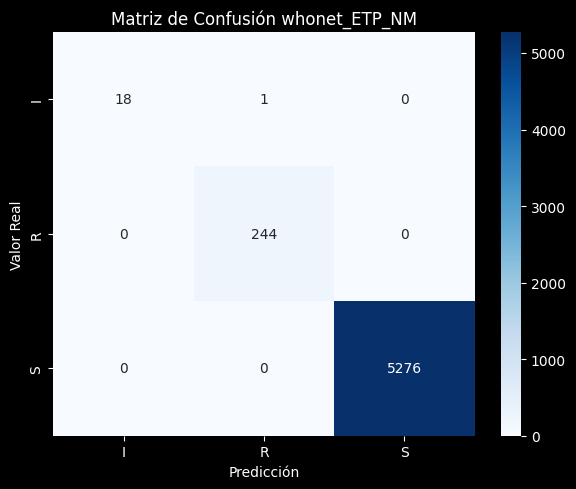


Reporte para: whonet_ETP_NM
              precision    recall  f1-score   support

           I       1.00      0.95      0.97        19
           R       1.00      1.00      1.00       244
           S       1.00      1.00      1.00      5276

    accuracy                           1.00      5539
   macro avg       1.00      0.98      0.99      5539
weighted avg       1.00      1.00      1.00      5539

202/202 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  FEP_NM pred_labels  pred_ids etiquetas etiquetas_predichas
2540          24     1.0           S         2         S                   S
44796         46     2.0           S         2         S                   S
19957         46    16.0           I         0         R                   R
42260         30    32.0           R         1         R                   R
37548         46     1.0           S         2         S                   S
✅ Accuracy: 0.9859

📊 Matriz de Confusión:
[[ 247    0    0]
 [  90  607    0]
 [   1  

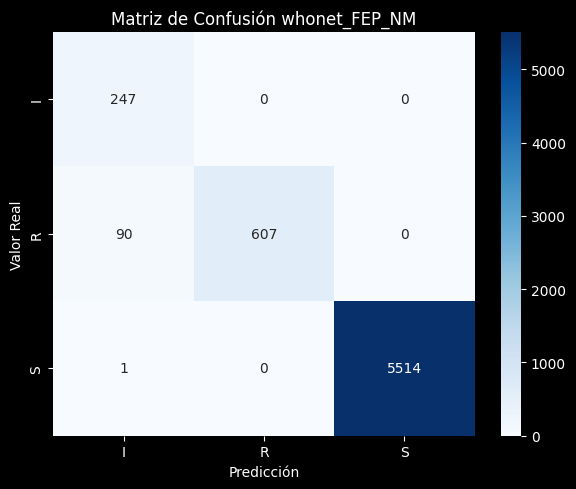


Reporte para: whonet_FEP_NM
              precision    recall  f1-score   support

           I       0.73      1.00      0.84       247
           R       1.00      0.87      0.93       697
           S       1.00      1.00      1.00      5515

    accuracy                           0.99      6459
   macro avg       0.91      0.96      0.93      6459
weighted avg       0.99      0.99      0.99      6459

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
       LOCAL_ORG  FLU_NM pred_labels  pred_ids etiquetas etiquetas_predichas
37150          0     0.5           S         2         S                   S
24636          0     0.5           S         2         S                   S
33589          0     0.5           S         2         S                   S
24452          1    32.0           R         1         R                   R
37752          1     0.5           S         2         S                   S
✅ Accuracy: 1.0000

📊 Matriz de Confusión:
[[  5   0   0]
 [  0 102   0]
 [  0   0 688]]


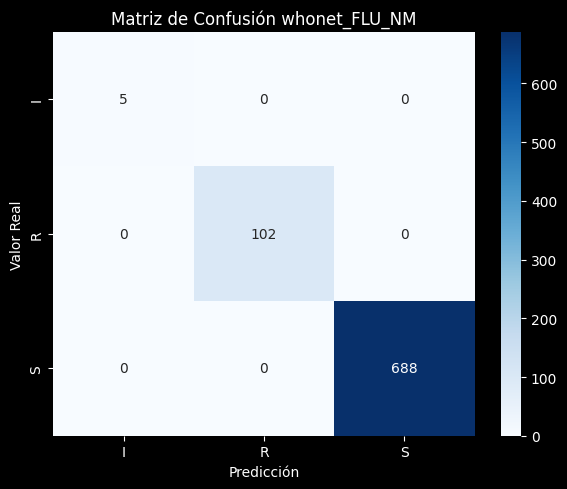


Reporte para: whonet_FLU_NM
              precision    recall  f1-score   support

           I       1.00      1.00      1.00         5
           R       1.00      1.00      1.00       102
           S       1.00      1.00      1.00       688

    accuracy                           1.00       795
   macro avg       1.00      1.00      1.00       795
weighted avg       1.00      1.00      1.00       795

59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  FOS_NM pred_labels  pred_ids etiquetas etiquetas_predichas
12736          0    16.0           S         2         S                   S
24924          0    32.0           S         2         S                   S
7320           0    16.0           S         2         S                   S
9827           0    16.0           S         2         S                   S
31588          0    16.0           S         2         S                   S
✅ Accuracy: 0.9606

📊 Matriz de Confusión:
[[   9    0    0]
 [  68    0    0]
 [   6    

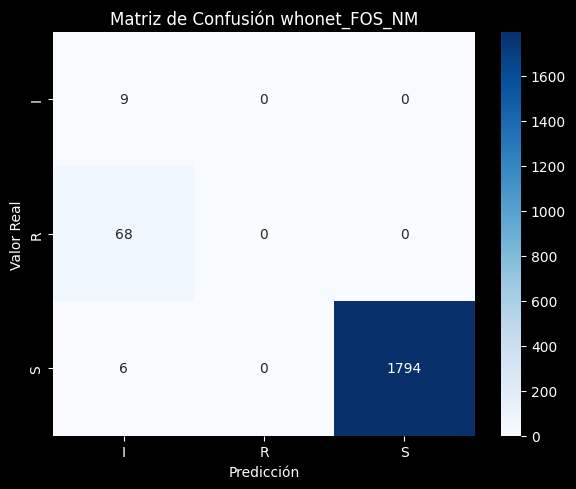


Reporte para: whonet_FOS_NM
              precision    recall  f1-score   support

           I       0.11      1.00      0.20         9
           R       0.00      0.00      0.00        68
           S       1.00      1.00      1.00      1800

    accuracy                           0.96      1877
   macro avg       0.37      0.67      0.40      1877
weighted avg       0.96      0.96      0.96      1877

26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       LOCAL_ORG  FOX_NM pred_labels  pred_ids etiquetas etiquetas_predichas
1166           8    16.0           I         0         I                   I
1598           6     4.0           S         2         S                   S
36026          6     4.0           S         2         S                   S
8776          13     4.0           S         2         S                   S
40943          9     4.0           S         2         S                   S
✅ Accuracy: 1.0000

📊 Matriz de Confusión:
[[ 44   0   0]
 [  0  66   0]
 [  0   0 713]]

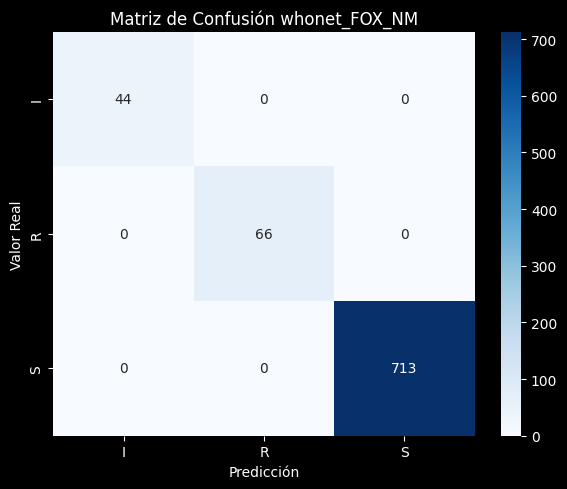


Reporte para: whonet_FOX_NM
              precision    recall  f1-score   support

           I       1.00      1.00      1.00        44
           R       1.00      1.00      1.00        66
           S       1.00      1.00      1.00       713

    accuracy                           1.00       823
   macro avg       1.00      1.00      1.00       823
weighted avg       1.00      1.00      1.00       823

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  GEN_NM pred_labels  pred_ids etiquetas etiquetas_predichas
32884         22     1.0           S         2         S                   S
25227         22     1.0           S         2         S                   S
3932          43     1.0           S         2         S                   S
10750         22     1.0           S         2         S                   S
42873         54     0.5           S         2         S                   S
✅ Accuracy: 0.9691

📊 Matriz de Confusión:
[[  52    0    0]
 [ 156  594    0]
 [   1  

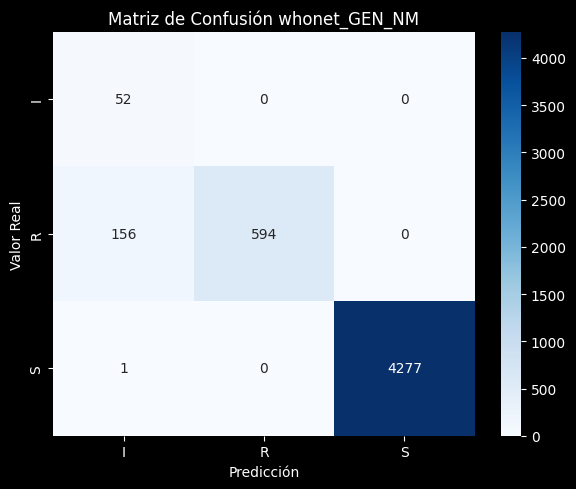


Reporte para: whonet_GEN_NM
              precision    recall  f1-score   support

           I       0.25      1.00      0.40        52
           R       1.00      0.79      0.88       750
           S       1.00      1.00      1.00      4278

    accuracy                           0.97      5080
   macro avg       0.75      0.93      0.76      5080
weighted avg       0.99      0.97      0.98      5080

107/107 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  IPM_NM pred_labels  pred_ids etiquetas etiquetas_predichas
22499         30    0.25           S         2         S                   S
11378         44    8.00           R         1         R                   R
45340          8    1.00           S         2         S                   S
9298          44    1.00           S         2         S                   S
20805         44    8.00           R         1         R                   R
✅ Accuracy: 0.9988

📊 Matriz de Confusión:
[[ 197    3    0]
 [   0  577    0]
 [   0  

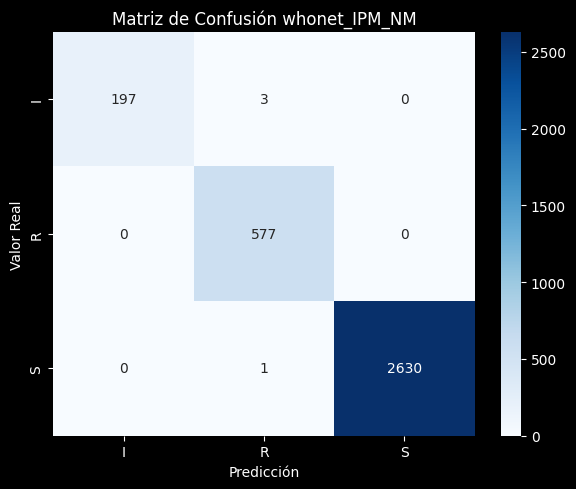


Reporte para: whonet_IPM_NM
              precision    recall  f1-score   support

           I       1.00      0.98      0.99       200
           R       0.99      1.00      1.00       577
           S       1.00      1.00      1.00      2631

    accuracy                           1.00      3408
   macro avg       1.00      0.99      1.00      3408
weighted avg       1.00      1.00      1.00      3408

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  LNZ_NM pred_labels  pred_ids etiquetas etiquetas_predichas
44118          6     2.0           S         2         S                   S
30280          4     2.0           S         2         S                   S
19407          6     2.0           S         2         S                   S
33027         12     1.0           S         2         S                   S
27345          6     2.0           S         2         S                   S
✅ Accuracy: 0.9889

📊 Matriz de Confusión:
[[   7    0    0]
 [   7    4    0]
 [   0   1

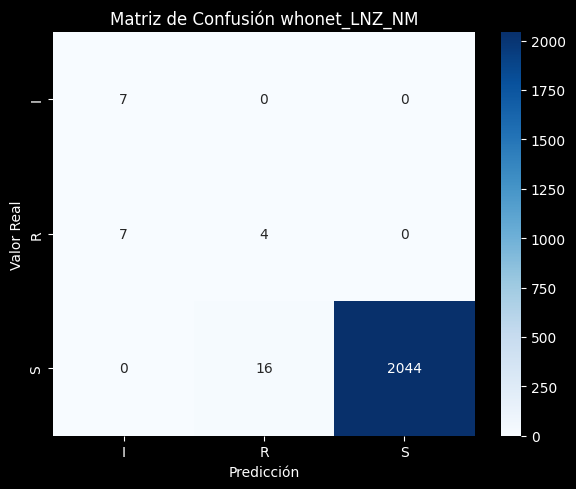


Reporte para: whonet_LNZ_NM
              precision    recall  f1-score   support

           I       0.50      1.00      0.67         7
           R       0.20      0.36      0.26        11
           S       1.00      0.99      1.00      2060

    accuracy                           0.99      2078
   macro avg       0.57      0.79      0.64      2078
weighted avg       0.99      0.99      0.99      2078

49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  LVX_NM pred_labels  pred_ids etiquetas etiquetas_predichas
11406         19    0.50           S         2         S                   S
4241           3    0.25           S         2         S                   S
25064          3    0.25           S         2         S                   S
23559          3    1.00           S         2         S                   S
41240          3    1.00           S         2         S                   S
✅ Accuracy: 0.9683

📊 Matriz de Confusión:
[[  18    0    0]
 [  49  103    0]
 [   0    

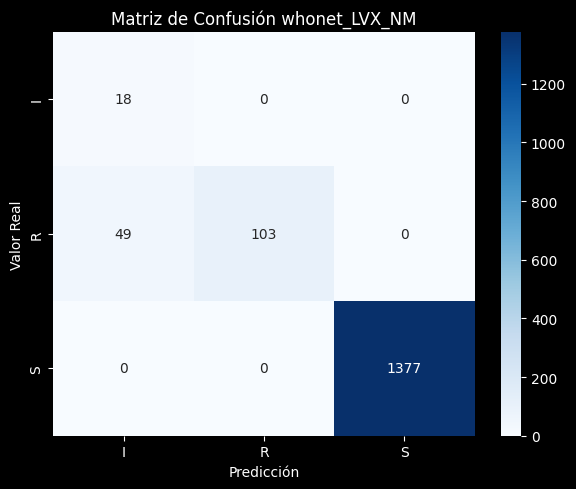


Reporte para: whonet_LVX_NM
              precision    recall  f1-score   support

           I       0.27      1.00      0.42        18
           R       1.00      0.68      0.81       152
           S       1.00      1.00      1.00      1377

    accuracy                           0.97      1547
   macro avg       0.76      0.89      0.74      1547
weighted avg       0.99      0.97      0.97      1547

207/207 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  MEM_NM pred_labels  pred_ids etiquetas etiquetas_predichas
48987         24    0.25           S         2         S                   S
21212          9    2.00           S         2         S                   S
39618         39    0.25           S         2         S                   S
33903         39    0.25           S         2         S                   S
8718          39    0.25           S         2         S                   S
✅ Accuracy: 0.9988

📊 Matriz de Confusión:
[[  46    0    1]
 [   6  476    1]
 [   0  

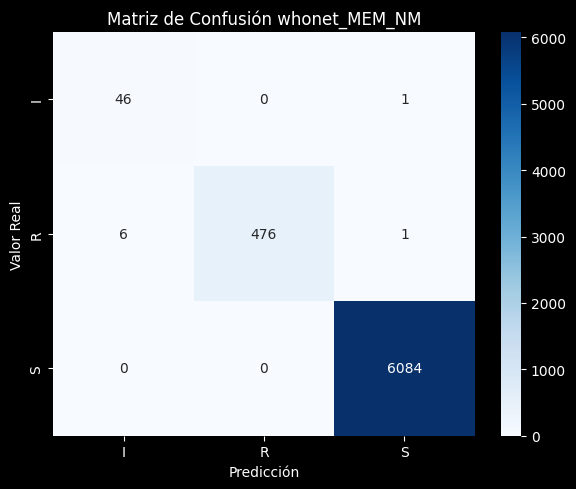


Reporte para: whonet_MEM_NM
              precision    recall  f1-score   support

           I       0.88      0.98      0.93        47
           R       1.00      0.99      0.99       483
           S       1.00      1.00      1.00      6084

    accuracy                           1.00      6614
   macro avg       0.96      0.99      0.97      6614
weighted avg       1.00      1.00      1.00      6614

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
       LOCAL_ORG  MIF_NM pred_labels  pred_ids etiquetas etiquetas_predichas
27520          0    0.06           S         2         S                   S
40480          0    0.06           S         2         S                   S
44068          0    0.06           S         2         S                   S
42314          3    0.06           S         2         S                   S
12106          0    0.06           S         2         S                   S
✅ Accuracy: 0.9945

📊 Matriz de Confusión:
[[  3   0   0]
 [  0   0   0]
 [  3   2 893]]


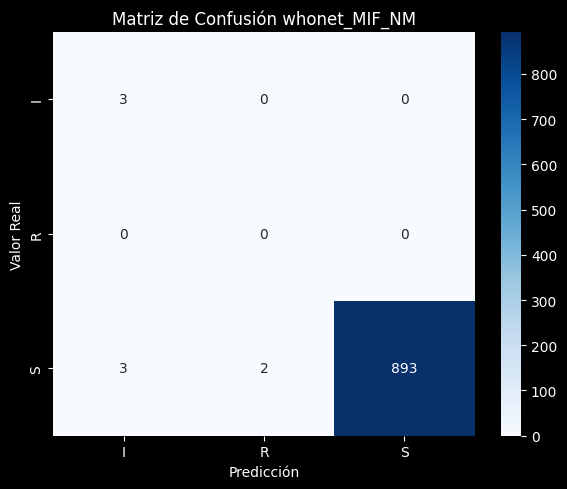


Reporte para: whonet_MIF_NM
              precision    recall  f1-score   support

           I       0.50      1.00      0.67         3
           R       0.00      0.00      0.00         0
           S       1.00      0.99      1.00       898

    accuracy                           0.99       901
   macro avg       0.50      0.66      0.55       901
weighted avg       1.00      0.99      1.00       901

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  NIT_NM pred_labels  pred_ids etiquetas etiquetas_predichas
5727          15    16.0           S         2         S                   S
16182         40    16.0           S         2         S                   S
48790         30    16.0           S         2         S                   S
25113         15    16.0           S         2         S                   S
49203         15    16.0           S         2         S                   S
✅ Accuracy: 0.9996

📊 Matriz de Confusión:
[[ 312    1    0]
 [   0  113    0]
 [   1  

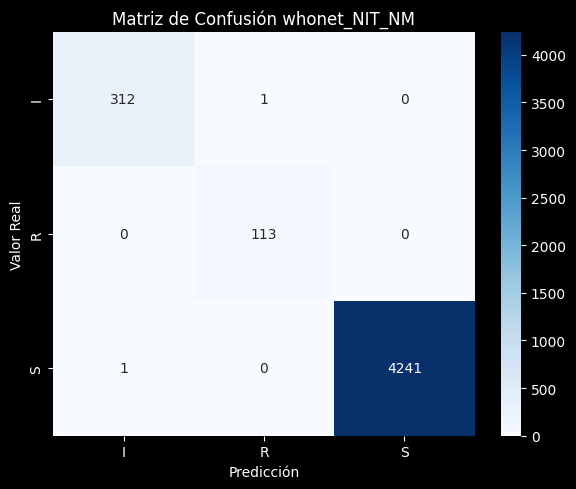


Reporte para: whonet_NIT_NM
              precision    recall  f1-score   support

           I       1.00      1.00      1.00       313
           R       0.99      1.00      1.00       113
           S       1.00      1.00      1.00      4242

    accuracy                           1.00      4668
   macro avg       1.00      1.00      1.00      4668
weighted avg       1.00      1.00      1.00      4668

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  NOR_NM pred_labels  pred_ids etiquetas etiquetas_predichas
21808         29     0.5           S         2         S                   S
36966         17     8.0           R         1         R                   R
12898         17     2.0           S         2         S                   S
2915          20     2.0           S         2         S                   S
3439          17     2.0           S         2         S                   S
✅ Accuracy: 0.9597

📊 Matriz de Confusión:
[[  24   35    0]
 [  78  567    0]
 [   0    

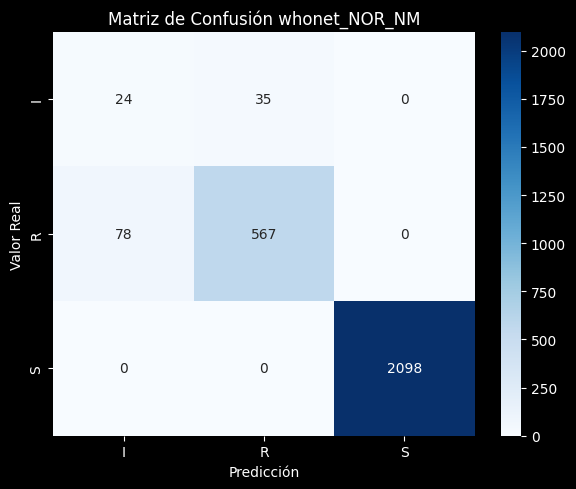


Reporte para: whonet_NOR_NM
              precision    recall  f1-score   support

           I       0.24      0.41      0.30        59
           R       0.94      0.88      0.91       645
           S       1.00      1.00      1.00      2098

    accuracy                           0.96      2802
   macro avg       0.73      0.76      0.74      2802
weighted avg       0.97      0.96      0.96      2802

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  OXA_NM pred_labels  pred_ids etiquetas etiquetas_predichas
25006          4    2.00           I         0         I                   I
9367           4    0.25           R         1         R                   R
29724          0    2.00           I         0         I                   I
24422          0    2.00           I         0         I                   I
41628          0    2.00           I         0         I                   I
✅ Accuracy: 0.9945

📊 Matriz de Confusión:
[[755   1   0]
 [  7 702   0]
 [  0   0   0]]


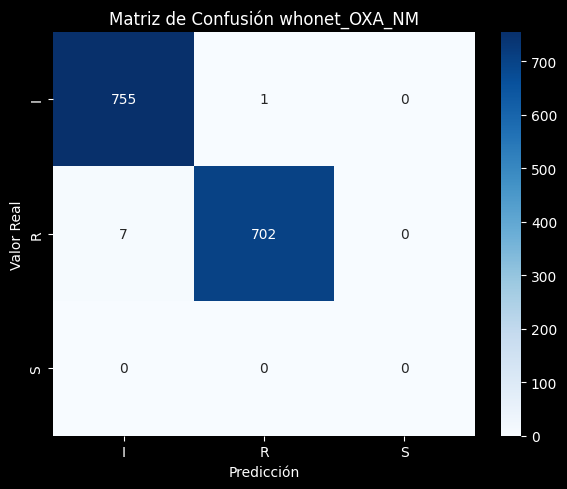


Reporte para: whonet_OXA_NM
              precision    recall  f1-score   support

           I       0.99      1.00      0.99       756
           R       1.00      0.99      0.99       709

    accuracy                           0.99      1465
   macro avg       0.99      0.99      0.99      1465
weighted avg       0.99      0.99      0.99      1465

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       LOCAL_ORG  PEN_NM pred_labels  pred_ids etiquetas etiquetas_predichas
6511           3     4.0           S         2         S                   S
788            3     1.0           S         2         S                   S
16871          3     8.0           S         2         S                   S
30821          3     4.0           S         2         S                   S
7028           3     2.0           S         2         S                   S
✅ Accuracy: 0.9971

📊 Matriz de Confusión:
[[  4   0   0]
 [  0  99   0]
 [  2   0 586]]


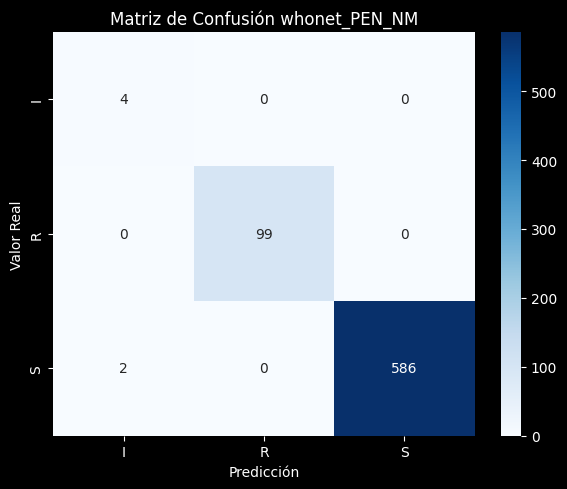


Reporte para: whonet_PEN_NM
              precision    recall  f1-score   support

           I       0.67      1.00      0.80         4
           R       1.00      1.00      1.00        99
           S       1.00      1.00      1.00       588

    accuracy                           1.00       691
   macro avg       0.89      1.00      0.93       691
weighted avg       1.00      1.00      1.00       691

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       LOCAL_ORG  RIF_NM pred_labels  pred_ids etiquetas etiquetas_predichas
47055          0     0.5           S         2         S                   S
22839          0     0.5           S         2         S                   S
10754          5     0.5           S         2         S                   S
48405          3     0.5           S         2         S                   S
2467           4     2.0           R         1         R                   R
✅ Accuracy: 0.9741

📊 Matriz de Confusión:
[[ 10   0   0]
 [ 18  28   0]
 [  0   0 639]]

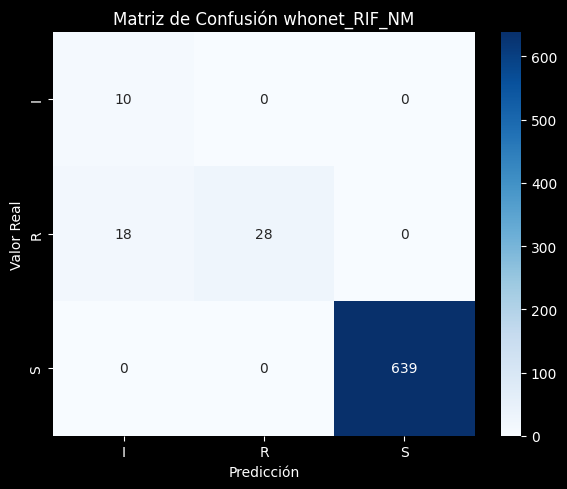


Reporte para: whonet_RIF_NM
              precision    recall  f1-score   support

           I       0.36      1.00      0.53        10
           R       1.00      0.61      0.76        46
           S       1.00      1.00      1.00       639

    accuracy                           0.97       695
   macro avg       0.79      0.87      0.76       695
weighted avg       0.99      0.97      0.98       695

154/154 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  SAM_NM pred_labels  pred_ids etiquetas etiquetas_predichas
9501          11     4.0           S         2         S                   S
23475          7     2.0           S         2         S                   S
49358          7    16.0           I         0         R                   R
36317         18     2.0           S         2         S                   S
18571          7    16.0           I         0         I                   I
✅ Accuracy: 0.7978

📊 Matriz de Confusión:
[[ 642   65    0]
 [ 930  402    0]
 [   0  

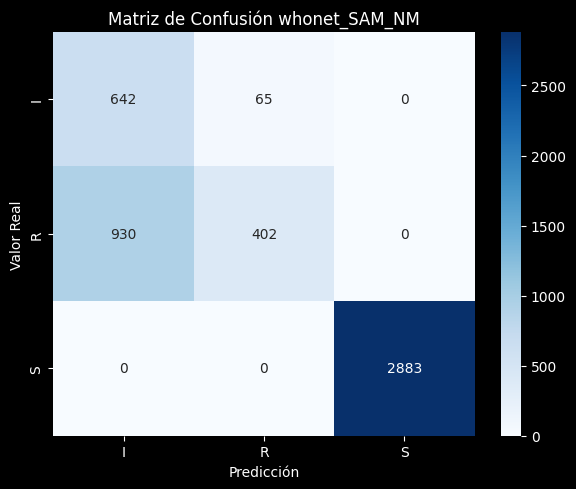


Reporte para: whonet_SAM_NM
              precision    recall  f1-score   support

           I       0.41      0.91      0.56       707
           R       0.86      0.30      0.45      1332
           S       1.00      1.00      1.00      2883

    accuracy                           0.80      4922
   macro avg       0.76      0.74      0.67      4922
weighted avg       0.88      0.80      0.79      4922

145/145 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
       LOCAL_ORG  SXT_NM pred_labels  pred_ids etiquetas etiquetas_predichas
481           50     0.5           S         2         S                   S
24940         19     8.0           R         1         R                   R
2934          19     8.0           R         1         R                   R
6648          50     0.5           S         2         S                   S
45866         50     0.5           S         2         S                   S
✅ Accuracy: 0.9996

📊 Matriz de Confusión:
[[   2    0    0]
 [   0 1262    0]
 [   1  

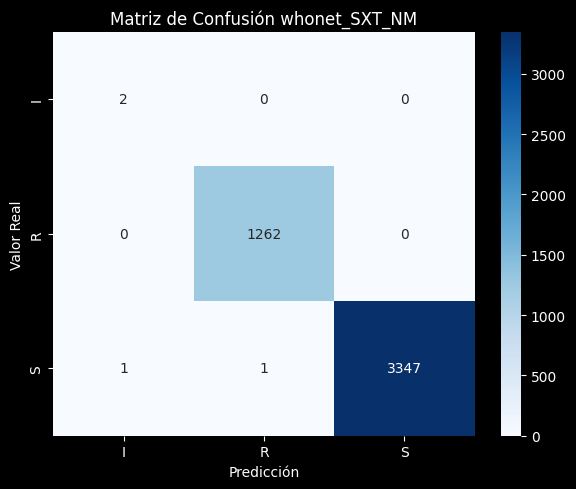


Reporte para: whonet_SXT_NM
              precision    recall  f1-score   support

           I       0.67      1.00      0.80         2
           R       1.00      1.00      1.00      1262
           S       1.00      1.00      1.00      3349

    accuracy                           1.00      4613
   macro avg       0.89      1.00      0.93      4613
weighted avg       1.00      1.00      1.00      4613

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
       LOCAL_ORG  TCY_NM pred_labels  pred_ids etiquetas etiquetas_predichas
46048          6     1.0           S         2         S                   S
26288         10     2.0           S         2         S                   S
23830         16     1.0           S         2         S                   S
20540          3     8.0           R         1         R                   R
28084          6     1.0           S         2         S                   S
✅ Accuracy: 0.9578

📊 Matriz de Confusión:
[[   4    1    0]
 [  83  846    0]
 [  13    

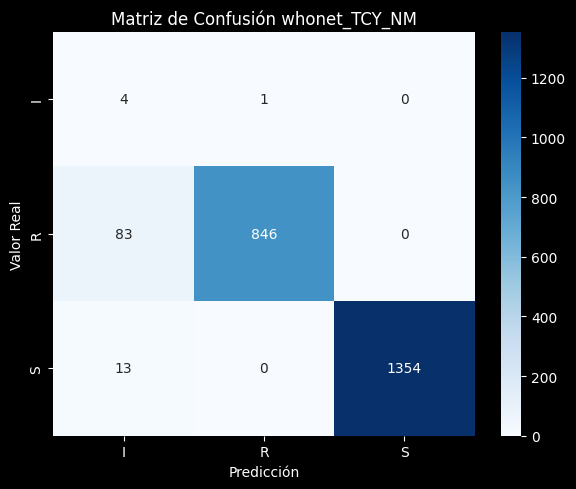


Reporte para: whonet_TCY_NM
              precision    recall  f1-score   support

           I       0.04      0.80      0.08         5
           R       1.00      0.91      0.95       929
           S       1.00      0.99      1.00      1367

    accuracy                           0.96      2301
   macro avg       0.68      0.90      0.67      2301
weighted avg       1.00      0.96      0.98      2301

77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  TGC_NM pred_labels  pred_ids etiquetas etiquetas_predichas
5371          11     0.5           S         2         S                   S
40184         16     0.5           S         2         S                   S
3147          29     0.5           S         2         S                   S
7779          11     0.5           S         2         S                   S
33914          1     0.5           S         2         S                   S
✅ Accuracy: 0.9825

📊 Matriz de Confusión:
[[  11   42    0]
 [   1   47    0]
 [   0    

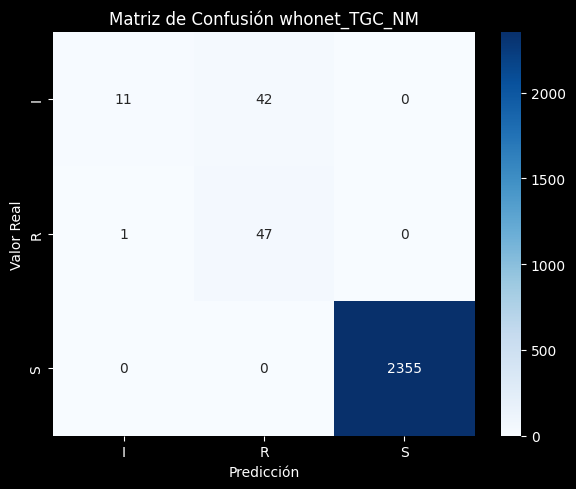


Reporte para: whonet_TGC_NM
              precision    recall  f1-score   support

           I       0.92      0.21      0.34        53
           R       0.53      0.98      0.69        48
           S       1.00      1.00      1.00      2355

    accuracy                           0.98      2456
   macro avg       0.81      0.73      0.67      2456
weighted avg       0.99      0.98      0.98      2456

115/115 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
       LOCAL_ORG  TZP_NM pred_labels  pred_ids etiquetas etiquetas_predichas
24810         24     4.0           S         2         S                   S
25170         24     4.0           S         2         S                   S
45141         24     4.0           S         2         S                   S
39748         43     8.0           S         2         S                   S
28219         43    64.0           R         1         R                   R
✅ Accuracy: 0.9888

📊 Matriz de Confusión:
[[ 147    0    1]
 [  40  658    0]
 [   0  

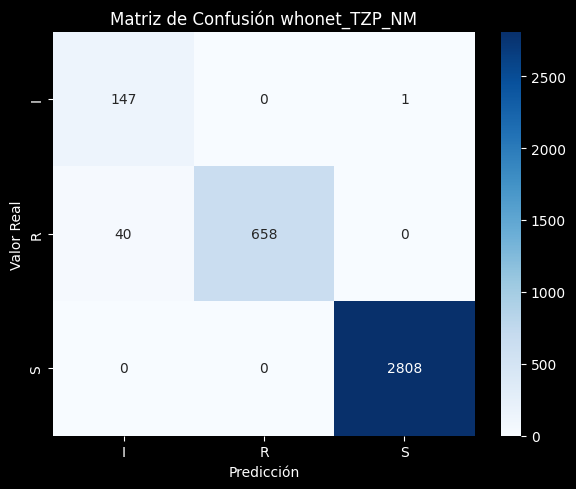


Reporte para: whonet_TZP_NM
              precision    recall  f1-score   support

           I       0.79      0.99      0.88       148
           R       1.00      0.94      0.97       698
           S       1.00      1.00      1.00      2808

    accuracy                           0.99      3654
   macro avg       0.93      0.98      0.95      3654
weighted avg       0.99      0.99      0.99      3654

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
       LOCAL_ORG  VAN_NM pred_labels  pred_ids etiquetas etiquetas_predichas
49925          4     1.0           S         2         S                   S
4438           8     2.0           S         2         S                   S
2193           4     0.5           S         2         S                   S
43616         14     0.5           S         2         S                   S
29547          2     2.0           S         2         S                   S
✅ Accuracy: 0.9990

📊 Matriz de Confusión:
[[   1    0    0]
 [   1   15    0]
 [   1    

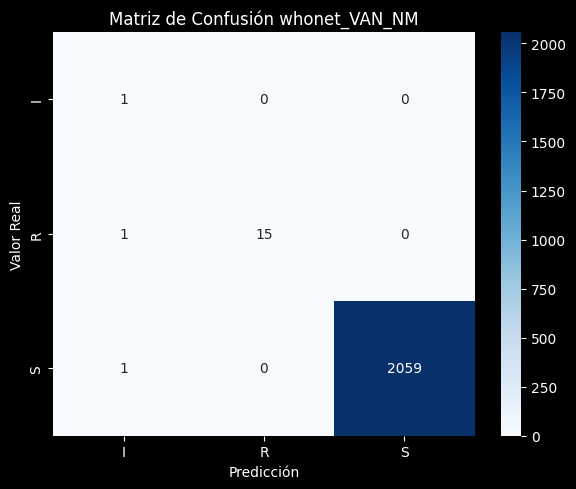


Reporte para: whonet_VAN_NM
              precision    recall  f1-score   support

           I       0.33      1.00      0.50         1
           R       1.00      0.94      0.97        16
           S       1.00      1.00      1.00      2060

    accuracy                           1.00      2077
   macro avg       0.78      0.98      0.82      2077
weighted avg       1.00      1.00      1.00      2077

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
       LOCAL_ORG  VOR_NM pred_labels  pred_ids etiquetas etiquetas_predichas
12204          0    0.12           S         2         S                   S
41180          2    0.12           S         2         S                   S
20412          0    0.12           S         2         S                   S
40121          1    0.12           S         2         S                   S
33724          0    0.12           S         2         S                   S
✅ Accuracy: 0.9962

📊 Matriz de Confusión:
[[ 61   0   1]
 [  2   4   0]
 [  0   0 729]]

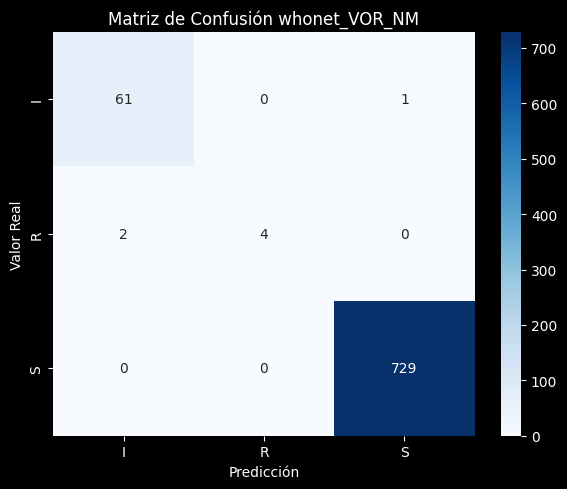


Reporte para: whonet_VOR_NM
              precision    recall  f1-score   support

           I       0.97      0.98      0.98        62
           R       1.00      0.67      0.80         6
           S       1.00      1.00      1.00       729

    accuracy                           1.00       797
   macro avg       0.99      0.88      0.93       797
weighted avg       1.00      1.00      1.00       797



In [ ]:
for nombre, modelo in models.items():
    antibiotico = nombre.replace("whonet_", "")
    df = X_test_list[nombre]
    df['LOCAL_ORG'] = pd.to_numeric(df['LOCAL_ORG'], errors='coerce')
    df[antibiotico] = df[antibiotico].astype('float32')

# Obtenemos probabilidades
    y_pred_probs = modelo.predict({'LOCAL_ORG': df['LOCAL_ORG'], 'atb': df[antibiotico]})
# Obtenemos la clase predicha
    y_pred_classes = np.argmax(y_pred_probs, axis=1)
#Decodificamos los Ids a las etiquetas originales
    y_pred_labels = le_etiquetas.inverse_transform(y_pred_classes) # ← transforma de vuelta a 'sensible', 'intermedio', 'resistente'

    #df['LOCAL_ORG'] = le_organismo.inverse_transform(df['LOCAL_ORG'])


    df['pred_labels'] = y_pred_labels
    df['pred_ids'] = y_pred_classes
    df['etiquetas_predichas']= le_etiquetas.inverse_transform(y_test_list[nombre])
    print(df.head())

    # Etiquetas reales
    y_test = y_test_list[nombre]
    y_test_labels = le_etiquetas.inverse_transform(y_test)

    # 1. Accuracy
    acc = accuracy_score(y_test_labels, y_pred_labels)
    print(f'✅ Accuracy: {acc:.4f}')


    # 2. Matriz de confusión
    cm = confusion_matrix(y_test_labels, y_pred_labels, labels = le_etiquetas.classes_)
    print("\n📊 Matriz de Confusión:")
    print(cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=le_etiquetas.classes_,
            yticklabels=le_etiquetas.classes_,
            cmap='Blues')
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.title(f'Matriz de Confusión {nombre}')
    plt.tight_layout()
    plt.show()

    # 3. Reporte de clasificación
    print(f"\nReporte para: {nombre}")
    print(classification_report(y_test_labels, y_pred_labels))




